In [25]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.layers.core import Dense, Dropout, Activation
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import math
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import warnings
import seaborn as sns
import sys
warnings.filterwarnings('ignore')

In [129]:
data = pd.read_csv('../../raw/LiChuan/TotalDataSet.csv')
submit = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [130]:
data = data[data['year'] != 2012]

In [131]:
data_new=data[['sale_date', 'class_id', 'sale_quantity',]]

KeyError: "['price_level'] not in index"

In [29]:
data_new['num_time']=(data['year']-2012)*12+data['month']

In [30]:
data_new

,sale_date,class_id,sale_quantity,num_time
1680,2013-01,125403,238.0,13.0
1681,2013-01,136916,613.0,13.0
1682,2013-01,178529,1465.0,13.0
1683,2013-01,194450,106.0,13.0
1684,2013-01,198427,31.0,13.0
1685,2013-01,209945,283.0,13.0
1686,2013-01,248352,1428.0,13.0
1687,2013-01,281301,1555.0,13.0
1688,2013-01,290854,676.0,13.0
1689,2013-01,291086,1089.0,13.0


In [31]:
# class_id=data_new.class_id.unique()

# class_id

# s=dict(zip(class_id ,range(len(class_id ))))

# for i in s:
#     data_new.loc[data_new['class_id'] ==i,'class_id_reflect']=s[i]

In [32]:
class_id_dummies=pd.get_dummies(data_new['class_id'],prefix='class_id')
data_new=pd.concat([data_new,class_id_dummies],axis=1)


In [33]:
# data_new.drop('class_id_reflect',axis=1,inplace=True)

In [34]:
data_new

,sale_date,class_id,sale_quantity,num_time,class_id_103507,class_id_124140,class_id_125403,class_id_136916,class_id_169673,class_id_175962,...,class_id_923841,class_id_924154,class_id_948936,class_id_950264,class_id_953842,class_id_961362,class_id_961962,class_id_963845,class_id_973106,class_id_978089
1680,2013-01,125403,238.0,13.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,2013-01,136916,613.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,2013-01,178529,1465.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,2013-01,194450,106.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,2013-01,198427,31.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,2013-01,209945,283.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,2013-01,248352,1428.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,2013-01,281301,1555.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,2013-01,290854,676.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,2013-01,291086,1089.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data=data_new

In [36]:
data

,sale_date,class_id,sale_quantity,num_time,class_id_103507,class_id_124140,class_id_125403,class_id_136916,class_id_169673,class_id_175962,...,class_id_923841,class_id_924154,class_id_948936,class_id_950264,class_id_953842,class_id_961362,class_id_961962,class_id_963845,class_id_973106,class_id_978089
1680,2013-01,125403,238.0,13.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,2013-01,136916,613.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,2013-01,178529,1465.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1683,2013-01,194450,106.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,2013-01,198427,31.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,2013-01,209945,283.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1686,2013-01,248352,1428.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1687,2013-01,281301,1555.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,2013-01,290854,676.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,2013-01,291086,1089.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# 去掉 2012 年数据

labels = data['sale_quantity']
data = data.drop(['sale_date', 'class_id', 'sale_quantity'], axis=1)

In [38]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = data[:-560]
test_1 = data[-560:-420]
labels_1 = labels[:-560]
test_labels_1 = labels[-560:-420]

# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = data[:-420]
test_2 = data[-420:-280]
labels_2 = labels[:-420]
test_labels_2 = labels[-420:-280]

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = data[:-280]
test_3 = data[-280:-140]
labels_3 = labels[:-280]
test_labels_3 = labels[-280:-140]

In [39]:
# 训练集 2013-01 至 2017-07, 测试集 2017-08
train_1 = train_1.as_matrix()
test_1 = test_1.as_matrix()
labels_1 = labels_1.as_matrix()
test_labels_1 = test_labels_1.as_matrix()
# 训练集 2013-01 至 2017-08, 测试集 2017-09
train_2 = train_2.as_matrix()
test_2 = test_2.as_matrix()
labels_2 = labels_2.as_matrix()
test_labels_2 = test_labels_2.as_matrix()

# 训练集 2013-01 至 2017-09, 测试集 2017-10
train_3 = train_3.as_matrix()
test_3 = test_3.as_matrix()
labels_3 = labels_3.as_matrix()
test_labels_3 = test_labels_3.as_matrix()

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_1 = scaler.fit_transform(train_1)
test_1 = scaler.fit_transform(test_1)

train_2 = scaler.fit_transform(train_2)
test_2 = scaler.fit_transform(test_2)

train_3 = scaler.fit_transform(train_3)
test_3 = scaler.fit_transform(test_3)

In [17]:
# labels_1 = scaler.fit_transform(labels_1)
# test_labels_1 = scaler.fit_transform(test_labels_1)

# labels_2 = scaler.fit_transform(labels_2)
# test_labels_2 = scaler.fit_transform(test_labels_2)

# labels_3 = scaler.fit_transform(labels_3)
# test_labels_3 = scaler.fit_transform(test_labels_3)

In [40]:

train_1 = train_1.reshape((train_1.shape[0], 1, train_1.shape[1]))
test_1 = test_1.reshape((test_1.shape[0], 1, test_1.shape[1]))
train_2 = train_2.reshape((train_2.shape[0], 1, train_2.shape[1]))
test_2 = test_2.reshape((test_2.shape[0], 1, test_2.shape[1]))
train_3 = train_3.reshape((train_3.shape[0], 1, train_3.shape[1]))
test_3 = test_3.reshape((test_3.shape[0], 1, test_3.shape[1]))

In [19]:
# BATCH_START = 0
# TIME_STEPS = 20 #取20步
# BATCH_SIZE = 50
# INPUT_SIZE = 1 #输入的值
# OUTPUT_SIZE = 1 #输出预测的值
# CELL_SIZE = 20
# LR = 0.006

In [20]:
def rmse_loss(ground_truth, pred):
    # return mean_squared_error(ground_truth, pred)
    return K.sqrt(K.mean(K.square(ground_truth-pred),axis=-1))



In [41]:
model = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model.add(LSTM(64, input_shape=(train_1.shape[1],train_1.shape[2])))
model.add(Dropout(.1))
model.add(Dense(64))
model.add(Dropout(.2))
model.add(Dense(16))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(loss = rmse_loss, optimizer='adam', metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                52736     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total para

Train on 7700 samples, validate on 140 samples
Epoch 1/3000
 - 1s - loss: 281.1949 - mean_squared_error: 329182.9683 - val_loss: 337.5249 - val_mean_squared_error: 290168.5000
Epoch 2/3000
 - 0s - loss: 278.7482 - mean_squared_error: 324492.2148 - val_loss: 324.6362 - val_mean_squared_error: 280907.2188
Epoch 3/3000
 - 0s - loss: 273.9545 - mean_squared_error: 315960.9012 - val_loss: 300.9487 - val_mean_squared_error: 264079.5000
Epoch 4/3000
 - 0s - loss: 265.9687 - mean_squared_error: 303354.4186 - val_loss: 268.9427 - val_mean_squared_error: 240626.2031
Epoch 5/3000
 - 0s - loss: 255.9649 - mean_squared_error: 289965.6885 - val_loss: 241.6283 - val_mean_squared_error: 215074.3906
Epoch 6/3000
 - 0s - loss: 250.2629 - mean_squared_error: 272336.1070 - val_loss: 231.6830 - val_mean_squared_error: 204471.4375
Epoch 7/3000
 - 0s - loss: 244.4843 - mean_squared_error: 273376.7009 - val_loss: 224.7765 - val_mean_squared_error: 191880.9062
Epoch 8/3000
 - 0s - loss: 228.4183 - mean_squared

Epoch 65/3000
 - 0s - loss: 114.1660 - mean_squared_error: 67324.6445 - val_loss: 138.5831 - val_mean_squared_error: 64162.6133
Epoch 66/3000
 - 0s - loss: 110.9917 - mean_squared_error: 67629.7630 - val_loss: 139.4873 - val_mean_squared_error: 62831.9414
Epoch 67/3000
 - 0s - loss: 111.8407 - mean_squared_error: 70164.1582 - val_loss: 138.1832 - val_mean_squared_error: 62750.7930
Epoch 68/3000
 - 0s - loss: 111.3167 - mean_squared_error: 65803.3867 - val_loss: 138.9872 - val_mean_squared_error: 62290.1641
Epoch 69/3000
 - 0s - loss: 113.1339 - mean_squared_error: 64846.6926 - val_loss: 135.7348 - val_mean_squared_error: 61702.0508
Epoch 70/3000
 - 0s - loss: 111.2940 - mean_squared_error: 66127.2205 - val_loss: 136.6617 - val_mean_squared_error: 61093.2422
Epoch 71/3000
 - 0s - loss: 113.0571 - mean_squared_error: 65766.2597 - val_loss: 137.8230 - val_mean_squared_error: 61703.8867
Epoch 72/3000
 - 0s - loss: 117.1600 - mean_squared_error: 67629.5714 - val_loss: 138.8289 - val_mean_sq

Epoch 129/3000
 - 0s - loss: 110.4174 - mean_squared_error: 61505.6773 - val_loss: 130.3920 - val_mean_squared_error: 52442.3750
Epoch 130/3000
 - 0s - loss: 119.1673 - mean_squared_error: 62737.1963 - val_loss: 132.4011 - val_mean_squared_error: 56396.2305
Epoch 131/3000
 - 0s - loss: 111.6096 - mean_squared_error: 64042.2213 - val_loss: 128.8467 - val_mean_squared_error: 53122.0391
Epoch 132/3000
 - 0s - loss: 110.1008 - mean_squared_error: 60136.3425 - val_loss: 129.1082 - val_mean_squared_error: 52392.9141
Epoch 133/3000
 - 0s - loss: 115.9307 - mean_squared_error: 61881.3228 - val_loss: 131.7666 - val_mean_squared_error: 55525.1797
Epoch 134/3000
 - 0s - loss: 106.1580 - mean_squared_error: 59259.7667 - val_loss: 127.8945 - val_mean_squared_error: 51743.0977
Epoch 135/3000
 - 0s - loss: 111.8091 - mean_squared_error: 59369.9425 - val_loss: 127.7320 - val_mean_squared_error: 52705.3945
Epoch 136/3000
 - 0s - loss: 112.6984 - mean_squared_error: 60977.7248 - val_loss: 128.9239 - val

Epoch 193/3000
 - 0s - loss: 98.9612 - mean_squared_error: 52988.9073 - val_loss: 121.5400 - val_mean_squared_error: 43861.3984
Epoch 194/3000
 - 0s - loss: 99.6772 - mean_squared_error: 53456.0711 - val_loss: 120.9585 - val_mean_squared_error: 43916.7500
Epoch 195/3000
 - 0s - loss: 99.4055 - mean_squared_error: 55037.8505 - val_loss: 120.9548 - val_mean_squared_error: 43518.4531
Epoch 196/3000
 - 0s - loss: 98.7819 - mean_squared_error: 52603.4344 - val_loss: 119.9121 - val_mean_squared_error: 43071.4375
Epoch 197/3000
 - 0s - loss: 99.8880 - mean_squared_error: 53116.2294 - val_loss: 120.5048 - val_mean_squared_error: 43150.3711
Epoch 198/3000
 - 0s - loss: 98.5293 - mean_squared_error: 53747.4712 - val_loss: 120.8321 - val_mean_squared_error: 43187.1289
Epoch 199/3000
 - 0s - loss: 99.2157 - mean_squared_error: 56203.9589 - val_loss: 121.6204 - val_mean_squared_error: 43216.4648
Epoch 200/3000
 - 0s - loss: 98.5674 - mean_squared_error: 55092.6131 - val_loss: 122.2280 - val_mean_sq

Epoch 257/3000
 - 0s - loss: 99.6026 - mean_squared_error: 52411.9520 - val_loss: 115.0663 - val_mean_squared_error: 37084.0430
Epoch 258/3000
 - 0s - loss: 102.7795 - mean_squared_error: 52156.0178 - val_loss: 116.1643 - val_mean_squared_error: 37668.3008
Epoch 259/3000
 - 0s - loss: 96.6843 - mean_squared_error: 50610.2398 - val_loss: 114.0796 - val_mean_squared_error: 36541.5508
Epoch 260/3000
 - 0s - loss: 101.7645 - mean_squared_error: 50757.1836 - val_loss: 114.4678 - val_mean_squared_error: 36983.2891
Epoch 261/3000
 - 0s - loss: 96.9814 - mean_squared_error: 52423.0801 - val_loss: 114.3205 - val_mean_squared_error: 36704.4219
Epoch 262/3000
 - 0s - loss: 95.3024 - mean_squared_error: 50266.3919 - val_loss: 114.2826 - val_mean_squared_error: 36629.3594
Epoch 263/3000
 - 0s - loss: 94.8219 - mean_squared_error: 49635.8862 - val_loss: 114.9817 - val_mean_squared_error: 36779.2617
Epoch 264/3000
 - 0s - loss: 94.7756 - mean_squared_error: 48744.9400 - val_loss: 114.5935 - val_mean_

Epoch 321/3000
 - 0s - loss: 93.6298 - mean_squared_error: 47074.3343 - val_loss: 108.7665 - val_mean_squared_error: 32337.5781
Epoch 322/3000
 - 0s - loss: 95.0613 - mean_squared_error: 49502.8671 - val_loss: 108.8845 - val_mean_squared_error: 32988.7383
Epoch 323/3000
 - 0s - loss: 94.7718 - mean_squared_error: 49098.3253 - val_loss: 109.5032 - val_mean_squared_error: 32999.1094
Epoch 324/3000
 - 0s - loss: 95.9977 - mean_squared_error: 50589.2674 - val_loss: 109.2269 - val_mean_squared_error: 32909.0938
Epoch 325/3000
 - 0s - loss: 99.5753 - mean_squared_error: 50957.9019 - val_loss: 111.1849 - val_mean_squared_error: 33470.1055
Epoch 326/3000
 - 0s - loss: 95.5729 - mean_squared_error: 47731.0141 - val_loss: 114.3976 - val_mean_squared_error: 34566.6875
Epoch 327/3000
 - 0s - loss: 94.7507 - mean_squared_error: 50166.6999 - val_loss: 109.6991 - val_mean_squared_error: 32384.8281
Epoch 328/3000
 - 0s - loss: 100.1414 - mean_squared_error: 50802.9841 - val_loss: 111.9506 - val_mean_s

Epoch 385/3000
 - 0s - loss: 91.8439 - mean_squared_error: 48477.0949 - val_loss: 104.7194 - val_mean_squared_error: 29475.8496
Epoch 386/3000
 - 0s - loss: 91.5677 - mean_squared_error: 49170.4191 - val_loss: 103.8534 - val_mean_squared_error: 29410.0293
Epoch 387/3000
 - 0s - loss: 93.4850 - mean_squared_error: 48841.7960 - val_loss: 104.9055 - val_mean_squared_error: 29876.8750
Epoch 388/3000
 - 0s - loss: 96.5463 - mean_squared_error: 49027.0155 - val_loss: 103.6842 - val_mean_squared_error: 29418.0898
Epoch 389/3000
 - 0s - loss: 94.5603 - mean_squared_error: 47799.8094 - val_loss: 107.9038 - val_mean_squared_error: 30848.7109
Epoch 390/3000
 - 0s - loss: 97.4054 - mean_squared_error: 50572.5373 - val_loss: 106.6915 - val_mean_squared_error: 30005.8008
Epoch 391/3000
 - 0s - loss: 92.1894 - mean_squared_error: 46959.1200 - val_loss: 107.4759 - val_mean_squared_error: 30737.9277
Epoch 392/3000
 - 0s - loss: 91.2523 - mean_squared_error: 47553.2880 - val_loss: 104.8797 - val_mean_sq

Epoch 449/3000
 - 0s - loss: 99.6263 - mean_squared_error: 48375.1683 - val_loss: 106.6178 - val_mean_squared_error: 28653.8789
Epoch 450/3000
 - 0s - loss: 92.3500 - mean_squared_error: 47867.4614 - val_loss: 101.8343 - val_mean_squared_error: 28320.6348
Epoch 451/3000
 - 0s - loss: 99.1336 - mean_squared_error: 49610.6838 - val_loss: 101.1454 - val_mean_squared_error: 27983.9238
Epoch 452/3000
 - 0s - loss: 97.4483 - mean_squared_error: 47767.2529 - val_loss: 102.4075 - val_mean_squared_error: 28582.1895
Epoch 453/3000
 - 0s - loss: 103.4983 - mean_squared_error: 47606.8722 - val_loss: 106.4281 - val_mean_squared_error: 28632.5918
Epoch 454/3000
 - 0s - loss: 103.1164 - mean_squared_error: 53226.6792 - val_loss: 107.9157 - val_mean_squared_error: 30956.8848
Epoch 455/3000
 - 0s - loss: 99.0698 - mean_squared_error: 49449.8279 - val_loss: 103.1603 - val_mean_squared_error: 28338.8438
Epoch 456/3000
 - 0s - loss: 95.9700 - mean_squared_error: 47819.3395 - val_loss: 103.2878 - val_mean_

Epoch 514/3000
 - 0s - loss: 88.6436 - mean_squared_error: 45714.2800 - val_loss: 97.8455 - val_mean_squared_error: 26872.7246
Epoch 515/3000
 - 0s - loss: 89.7880 - mean_squared_error: 46357.4112 - val_loss: 97.6600 - val_mean_squared_error: 26732.1934
Epoch 516/3000
 - 0s - loss: 88.8673 - mean_squared_error: 45392.1054 - val_loss: 97.6829 - val_mean_squared_error: 26492.0723
Epoch 517/3000
 - 0s - loss: 89.0297 - mean_squared_error: 45386.4376 - val_loss: 97.5650 - val_mean_squared_error: 26604.9902
Epoch 518/3000
 - 0s - loss: 92.6414 - mean_squared_error: 48592.6819 - val_loss: 98.8159 - val_mean_squared_error: 26791.1191
Epoch 519/3000
 - 0s - loss: 91.3929 - mean_squared_error: 48214.2543 - val_loss: 99.0417 - val_mean_squared_error: 26556.5039
Epoch 520/3000
 - 0s - loss: 92.6182 - mean_squared_error: 47871.3927 - val_loss: 97.2689 - val_mean_squared_error: 25899.0254
Epoch 521/3000
 - 0s - loss: 89.3694 - mean_squared_error: 46770.9454 - val_loss: 96.8452 - val_mean_squared_er

Epoch 579/3000
 - 0s - loss: 87.6279 - mean_squared_error: 45895.7434 - val_loss: 97.0889 - val_mean_squared_error: 25881.7188
Epoch 580/3000
 - 0s - loss: 88.6193 - mean_squared_error: 45157.9413 - val_loss: 97.1333 - val_mean_squared_error: 25737.2930
Epoch 581/3000
 - 0s - loss: 88.9022 - mean_squared_error: 43462.6205 - val_loss: 99.0652 - val_mean_squared_error: 26022.1836
Epoch 582/3000
 - 0s - loss: 87.4006 - mean_squared_error: 44547.3028 - val_loss: 96.4803 - val_mean_squared_error: 24922.5078
Epoch 583/3000
 - 0s - loss: 92.2327 - mean_squared_error: 47120.5054 - val_loss: 96.7817 - val_mean_squared_error: 25262.3223
Epoch 584/3000
 - 0s - loss: 88.9875 - mean_squared_error: 45295.9542 - val_loss: 95.5270 - val_mean_squared_error: 24439.3730
Epoch 585/3000
 - 0s - loss: 91.1425 - mean_squared_error: 46569.0954 - val_loss: 96.2314 - val_mean_squared_error: 25033.8164
Epoch 586/3000
 - 0s - loss: 87.4036 - mean_squared_error: 44074.8180 - val_loss: 96.1002 - val_mean_squared_er

Epoch 644/3000
 - 0s - loss: 92.7784 - mean_squared_error: 47191.7491 - val_loss: 96.0248 - val_mean_squared_error: 25050.3457
Epoch 645/3000
 - 0s - loss: 88.1542 - mean_squared_error: 46001.5518 - val_loss: 95.1609 - val_mean_squared_error: 24344.5410
Epoch 646/3000
 - 0s - loss: 87.4648 - mean_squared_error: 44673.8370 - val_loss: 96.3058 - val_mean_squared_error: 25136.5137
Epoch 647/3000
 - 0s - loss: 86.9561 - mean_squared_error: 45355.7103 - val_loss: 95.3533 - val_mean_squared_error: 24264.3008
Epoch 648/3000
 - 0s - loss: 87.6527 - mean_squared_error: 44841.1120 - val_loss: 94.7650 - val_mean_squared_error: 24161.5078
Epoch 649/3000
 - 0s - loss: 87.4267 - mean_squared_error: 44026.2763 - val_loss: 96.2598 - val_mean_squared_error: 25250.2793
Epoch 650/3000
 - 0s - loss: 86.6449 - mean_squared_error: 44163.7038 - val_loss: 97.3585 - val_mean_squared_error: 25838.1641
Epoch 651/3000
 - 0s - loss: 87.2250 - mean_squared_error: 43762.9387 - val_loss: 96.3354 - val_mean_squared_er

Epoch 709/3000
 - 0s - loss: 90.9010 - mean_squared_error: 42662.4547 - val_loss: 96.2775 - val_mean_squared_error: 24585.7578
Epoch 710/3000
 - 0s - loss: 87.5284 - mean_squared_error: 44870.7152 - val_loss: 96.1051 - val_mean_squared_error: 24719.6465
Epoch 711/3000
 - 0s - loss: 87.9131 - mean_squared_error: 47287.4437 - val_loss: 94.6651 - val_mean_squared_error: 23720.2598
Epoch 712/3000
 - 0s - loss: 87.5906 - mean_squared_error: 45655.7293 - val_loss: 95.4838 - val_mean_squared_error: 24127.2324
Epoch 713/3000
 - 0s - loss: 87.8663 - mean_squared_error: 45161.2853 - val_loss: 94.4663 - val_mean_squared_error: 23697.4531
Epoch 714/3000
 - 0s - loss: 90.9403 - mean_squared_error: 46054.6687 - val_loss: 93.3469 - val_mean_squared_error: 23581.9062
Epoch 715/3000
 - 0s - loss: 86.9512 - mean_squared_error: 45513.1297 - val_loss: 94.3830 - val_mean_squared_error: 23726.3438
Epoch 716/3000
 - 0s - loss: 88.9041 - mean_squared_error: 44370.0764 - val_loss: 94.5727 - val_mean_squared_er

Epoch 774/3000
 - 0s - loss: 87.3336 - mean_squared_error: 48237.4962 - val_loss: 92.8826 - val_mean_squared_error: 22517.2969
Epoch 775/3000
 - 0s - loss: 89.3763 - mean_squared_error: 46021.3998 - val_loss: 92.3288 - val_mean_squared_error: 22516.9707
Epoch 776/3000
 - 0s - loss: 85.7404 - mean_squared_error: 45324.7749 - val_loss: 92.3300 - val_mean_squared_error: 22243.3105
Epoch 777/3000
 - 0s - loss: 89.0208 - mean_squared_error: 44519.7402 - val_loss: 92.1267 - val_mean_squared_error: 22136.2637
Epoch 778/3000
 - 0s - loss: 86.4113 - mean_squared_error: 45820.7192 - val_loss: 92.6080 - val_mean_squared_error: 22601.5742
Epoch 779/3000
 - 0s - loss: 85.2253 - mean_squared_error: 43856.8232 - val_loss: 92.6419 - val_mean_squared_error: 22517.3223
Epoch 780/3000
 - 0s - loss: 84.6811 - mean_squared_error: 43268.1205 - val_loss: 92.2564 - val_mean_squared_error: 22490.5137
Epoch 781/3000
 - 0s - loss: 85.4564 - mean_squared_error: 44311.7445 - val_loss: 92.9028 - val_mean_squared_er

Epoch 839/3000
 - 0s - loss: 85.5293 - mean_squared_error: 43986.2190 - val_loss: 93.7518 - val_mean_squared_error: 22620.8711
Epoch 840/3000
 - 0s - loss: 86.8988 - mean_squared_error: 45852.5883 - val_loss: 92.4564 - val_mean_squared_error: 21307.5840
Epoch 841/3000
 - 0s - loss: 89.3895 - mean_squared_error: 46074.7922 - val_loss: 91.7305 - val_mean_squared_error: 21694.5957
Epoch 842/3000
 - 0s - loss: 87.2736 - mean_squared_error: 44885.4286 - val_loss: 92.5437 - val_mean_squared_error: 22080.6895
Epoch 843/3000
 - 0s - loss: 88.3257 - mean_squared_error: 46618.5014 - val_loss: 93.5359 - val_mean_squared_error: 22131.9316
Epoch 844/3000
 - 0s - loss: 87.2980 - mean_squared_error: 47514.2689 - val_loss: 93.3007 - val_mean_squared_error: 21800.8320
Epoch 845/3000
 - 0s - loss: 88.5315 - mean_squared_error: 44964.4039 - val_loss: 91.7791 - val_mean_squared_error: 21688.8320
Epoch 846/3000
 - 0s - loss: 85.2462 - mean_squared_error: 44609.9209 - val_loss: 91.6833 - val_mean_squared_er

Epoch 904/3000
 - 0s - loss: 86.2399 - mean_squared_error: 43426.5549 - val_loss: 92.9059 - val_mean_squared_error: 22526.0469
Epoch 905/3000
 - 0s - loss: 86.9682 - mean_squared_error: 46465.8994 - val_loss: 92.7526 - val_mean_squared_error: 22236.4668
Epoch 906/3000
 - 0s - loss: 87.0127 - mean_squared_error: 44723.3330 - val_loss: 92.6746 - val_mean_squared_error: 22541.1211
Epoch 907/3000
 - 0s - loss: 90.3374 - mean_squared_error: 45793.9540 - val_loss: 92.9266 - val_mean_squared_error: 21744.7324
Epoch 908/3000
 - 0s - loss: 85.8494 - mean_squared_error: 45772.9060 - val_loss: 94.4889 - val_mean_squared_error: 22997.6895
Epoch 909/3000
 - 0s - loss: 85.3322 - mean_squared_error: 46372.6224 - val_loss: 92.1498 - val_mean_squared_error: 21776.5352
Epoch 910/3000
 - 0s - loss: 85.0810 - mean_squared_error: 43342.0284 - val_loss: 92.7461 - val_mean_squared_error: 22034.9746
Epoch 911/3000
 - 0s - loss: 85.4704 - mean_squared_error: 42830.2981 - val_loss: 92.0336 - val_mean_squared_er

Epoch 969/3000
 - 0s - loss: 88.4156 - mean_squared_error: 46990.0668 - val_loss: 91.4324 - val_mean_squared_error: 20910.1113
Epoch 970/3000
 - 0s - loss: 94.0631 - mean_squared_error: 45200.9977 - val_loss: 90.2540 - val_mean_squared_error: 21694.8672
Epoch 971/3000
 - 0s - loss: 87.4809 - mean_squared_error: 46327.9024 - val_loss: 100.8983 - val_mean_squared_error: 27390.1777
Epoch 972/3000
 - 0s - loss: 89.6845 - mean_squared_error: 49391.9976 - val_loss: 91.7714 - val_mean_squared_error: 20884.8594
Epoch 973/3000
 - 0s - loss: 94.2326 - mean_squared_error: 47192.7497 - val_loss: 91.7184 - val_mean_squared_error: 22314.7188
Epoch 974/3000
 - 0s - loss: 85.9027 - mean_squared_error: 42691.0315 - val_loss: 94.4056 - val_mean_squared_error: 24670.0059
Epoch 975/3000
 - 0s - loss: 87.8057 - mean_squared_error: 47170.9974 - val_loss: 92.8199 - val_mean_squared_error: 22195.6641
Epoch 976/3000
 - 0s - loss: 89.7034 - mean_squared_error: 44034.2605 - val_loss: 90.4428 - val_mean_squared_e

Epoch 1034/3000
 - 0s - loss: 85.7942 - mean_squared_error: 45792.7766 - val_loss: 90.2419 - val_mean_squared_error: 21669.2852
Epoch 1035/3000
 - 0s - loss: 83.4101 - mean_squared_error: 43660.0588 - val_loss: 90.7322 - val_mean_squared_error: 21828.2832
Epoch 1036/3000
 - 0s - loss: 84.8431 - mean_squared_error: 45809.3814 - val_loss: 91.9742 - val_mean_squared_error: 22510.1680
Epoch 1037/3000
 - 0s - loss: 85.6036 - mean_squared_error: 47240.0253 - val_loss: 90.4991 - val_mean_squared_error: 21417.0469
Epoch 1038/3000
 - 0s - loss: 86.8855 - mean_squared_error: 46153.6794 - val_loss: 90.2870 - val_mean_squared_error: 21767.7402
Epoch 1039/3000
 - 0s - loss: 84.4079 - mean_squared_error: 41710.0053 - val_loss: 90.2928 - val_mean_squared_error: 21109.6211
Epoch 1040/3000
 - 0s - loss: 84.2932 - mean_squared_error: 43787.5156 - val_loss: 89.4202 - val_mean_squared_error: 20543.1895
Epoch 1041/3000
 - 0s - loss: 83.8841 - mean_squared_error: 44054.3961 - val_loss: 90.4384 - val_mean_sq

 - 0s - loss: 82.5213 - mean_squared_error: 43239.2270 - val_loss: 90.2619 - val_mean_squared_error: 21548.0430
Epoch 1099/3000
 - 0s - loss: 84.4196 - mean_squared_error: 42093.2526 - val_loss: 90.1959 - val_mean_squared_error: 21729.8008
Epoch 1100/3000
 - 0s - loss: 83.0115 - mean_squared_error: 43629.8982 - val_loss: 90.4334 - val_mean_squared_error: 21482.4492
Epoch 1101/3000
 - 0s - loss: 85.1420 - mean_squared_error: 45382.7526 - val_loss: 90.7517 - val_mean_squared_error: 22229.1816
Epoch 1102/3000
 - 0s - loss: 84.3604 - mean_squared_error: 44511.6314 - val_loss: 90.7132 - val_mean_squared_error: 22159.2852
Epoch 1103/3000
 - 0s - loss: 85.9987 - mean_squared_error: 44949.0422 - val_loss: 89.4648 - val_mean_squared_error: 20994.0469
Epoch 1104/3000
 - 0s - loss: 84.9373 - mean_squared_error: 44142.2438 - val_loss: 90.9586 - val_mean_squared_error: 21540.2402
Epoch 1105/3000
 - 0s - loss: 87.4462 - mean_squared_error: 43072.9487 - val_loss: 90.3203 - val_mean_squared_error: 210

Epoch 1163/3000
 - 0s - loss: 86.1028 - mean_squared_error: 45539.3851 - val_loss: 93.1952 - val_mean_squared_error: 21375.7188
Epoch 1164/3000
 - 0s - loss: 84.0999 - mean_squared_error: 43680.0389 - val_loss: 90.3649 - val_mean_squared_error: 20793.5605
Epoch 1165/3000
 - 0s - loss: 87.0518 - mean_squared_error: 47871.6720 - val_loss: 91.4079 - val_mean_squared_error: 22058.6172
Epoch 1166/3000
 - 0s - loss: 85.5371 - mean_squared_error: 45915.6563 - val_loss: 91.6696 - val_mean_squared_error: 21379.5391
Epoch 1167/3000
 - 0s - loss: 85.1855 - mean_squared_error: 44548.7194 - val_loss: 90.7224 - val_mean_squared_error: 20841.2246
Epoch 1168/3000
 - 0s - loss: 85.0463 - mean_squared_error: 42873.5249 - val_loss: 94.1860 - val_mean_squared_error: 22381.0508
Epoch 1169/3000
 - 0s - loss: 85.5821 - mean_squared_error: 45150.9243 - val_loss: 90.3447 - val_mean_squared_error: 20359.0137
Epoch 1170/3000
 - 0s - loss: 88.3962 - mean_squared_error: 45342.0860 - val_loss: 91.4238 - val_mean_sq

 - 0s - loss: 82.9046 - mean_squared_error: 43771.7689 - val_loss: 89.2982 - val_mean_squared_error: 21015.7891
Epoch 1228/3000
 - 0s - loss: 84.5867 - mean_squared_error: 42937.8037 - val_loss: 90.1523 - val_mean_squared_error: 21799.1816
Epoch 1229/3000
 - 0s - loss: 84.5536 - mean_squared_error: 46327.8181 - val_loss: 89.0883 - val_mean_squared_error: 19744.0469
Epoch 1230/3000
 - 0s - loss: 86.6237 - mean_squared_error: 47230.4621 - val_loss: 91.0432 - val_mean_squared_error: 21429.2324
Epoch 1231/3000
 - 0s - loss: 84.7407 - mean_squared_error: 43638.6863 - val_loss: 90.8576 - val_mean_squared_error: 21531.8789
Epoch 1232/3000
 - 0s - loss: 87.3386 - mean_squared_error: 44857.2299 - val_loss: 90.5426 - val_mean_squared_error: 21518.2266
Epoch 1233/3000
 - 0s - loss: 84.8727 - mean_squared_error: 44049.6388 - val_loss: 90.9323 - val_mean_squared_error: 21605.1191
Epoch 1234/3000
 - 0s - loss: 86.5141 - mean_squared_error: 48379.3020 - val_loss: 90.6671 - val_mean_squared_error: 215

Epoch 1292/3000
 - 0s - loss: 83.8104 - mean_squared_error: 44211.6253 - val_loss: 90.4314 - val_mean_squared_error: 21204.1328
Epoch 1293/3000
 - 0s - loss: 83.2861 - mean_squared_error: 42747.4241 - val_loss: 89.6002 - val_mean_squared_error: 20951.7070
Epoch 1294/3000
 - 0s - loss: 85.3444 - mean_squared_error: 45846.7553 - val_loss: 90.5473 - val_mean_squared_error: 21956.2617
Epoch 1295/3000
 - 0s - loss: 85.8836 - mean_squared_error: 43660.0884 - val_loss: 89.7591 - val_mean_squared_error: 21308.2051
Epoch 1296/3000
 - 0s - loss: 83.4932 - mean_squared_error: 42869.0396 - val_loss: 90.2409 - val_mean_squared_error: 21930.3359
Epoch 1297/3000
 - 0s - loss: 83.8135 - mean_squared_error: 44770.0138 - val_loss: 89.9658 - val_mean_squared_error: 21467.6582
Epoch 1298/3000
 - 0s - loss: 83.4086 - mean_squared_error: 43441.5800 - val_loss: 89.5262 - val_mean_squared_error: 21132.0605
Epoch 1299/3000
 - 0s - loss: 84.0503 - mean_squared_error: 45003.9853 - val_loss: 90.7871 - val_mean_sq

 - 0s - loss: 83.7067 - mean_squared_error: 41531.0755 - val_loss: 89.4594 - val_mean_squared_error: 21319.9453
Epoch 1357/3000
 - 0s - loss: 82.3916 - mean_squared_error: 42473.3469 - val_loss: 89.5574 - val_mean_squared_error: 22084.6133
Epoch 1358/3000
 - 0s - loss: 83.6932 - mean_squared_error: 44279.6227 - val_loss: 90.0115 - val_mean_squared_error: 22109.0293
Epoch 1359/3000
 - 0s - loss: 83.8595 - mean_squared_error: 45540.5146 - val_loss: 89.3151 - val_mean_squared_error: 21308.9434
Epoch 1360/3000
 - 0s - loss: 83.6938 - mean_squared_error: 44392.0922 - val_loss: 88.5639 - val_mean_squared_error: 19859.1348
Epoch 1361/3000
 - 0s - loss: 87.9282 - mean_squared_error: 46595.0697 - val_loss: 89.2727 - val_mean_squared_error: 21388.1602
Epoch 1362/3000
 - 0s - loss: 85.1210 - mean_squared_error: 46761.7131 - val_loss: 90.0364 - val_mean_squared_error: 21710.3027
Epoch 1363/3000
 - 0s - loss: 84.4521 - mean_squared_error: 42875.3416 - val_loss: 89.0123 - val_mean_squared_error: 204

Epoch 1421/3000
 - 0s - loss: 81.5150 - mean_squared_error: 41578.6655 - val_loss: 89.3222 - val_mean_squared_error: 20715.5898
Epoch 1422/3000
 - 0s - loss: 82.5653 - mean_squared_error: 45387.8087 - val_loss: 89.4131 - val_mean_squared_error: 21520.8926
Epoch 1423/3000
 - 0s - loss: 82.7371 - mean_squared_error: 41762.4965 - val_loss: 89.6389 - val_mean_squared_error: 21339.9492
Epoch 1424/3000
 - 0s - loss: 82.2013 - mean_squared_error: 44243.7608 - val_loss: 89.9850 - val_mean_squared_error: 21263.8457
Epoch 1425/3000
 - 0s - loss: 83.0349 - mean_squared_error: 46550.0531 - val_loss: 90.2635 - val_mean_squared_error: 21746.0938
Epoch 1426/3000
 - 0s - loss: 84.6239 - mean_squared_error: 45593.3487 - val_loss: 89.2438 - val_mean_squared_error: 20792.7754
Epoch 1427/3000
 - 0s - loss: 83.0916 - mean_squared_error: 42756.5733 - val_loss: 89.0191 - val_mean_squared_error: 20869.7402
Epoch 1428/3000
 - 0s - loss: 83.0384 - mean_squared_error: 44387.5312 - val_loss: 88.9686 - val_mean_sq

 - 0s - loss: 82.2934 - mean_squared_error: 42409.0683 - val_loss: 88.6276 - val_mean_squared_error: 20354.7148
Epoch 1486/3000
 - 0s - loss: 84.1599 - mean_squared_error: 41657.2766 - val_loss: 89.6427 - val_mean_squared_error: 21286.0723
Epoch 1487/3000
 - 0s - loss: 87.7598 - mean_squared_error: 45269.9554 - val_loss: 89.3416 - val_mean_squared_error: 21184.1816
Epoch 1488/3000
 - 0s - loss: 86.0036 - mean_squared_error: 45770.0127 - val_loss: 89.1649 - val_mean_squared_error: 21063.0801
Epoch 1489/3000
 - 0s - loss: 83.5208 - mean_squared_error: 45316.8856 - val_loss: 88.3185 - val_mean_squared_error: 20226.8750
Epoch 1490/3000
 - 0s - loss: 82.7597 - mean_squared_error: 43287.9773 - val_loss: 89.3606 - val_mean_squared_error: 21606.6797
Epoch 1491/3000
 - 0s - loss: 84.2468 - mean_squared_error: 43691.1833 - val_loss: 89.2714 - val_mean_squared_error: 21178.7520
Epoch 1492/3000
 - 0s - loss: 82.8936 - mean_squared_error: 42668.0028 - val_loss: 88.2703 - val_mean_squared_error: 204

Epoch 1550/3000
 - 0s - loss: 82.0343 - mean_squared_error: 43283.3258 - val_loss: 89.2779 - val_mean_squared_error: 20588.5410
Epoch 1551/3000
 - 0s - loss: 83.0506 - mean_squared_error: 45033.8392 - val_loss: 88.6692 - val_mean_squared_error: 20303.7988
Epoch 1552/3000
 - 0s - loss: 83.4615 - mean_squared_error: 43742.5194 - val_loss: 90.1422 - val_mean_squared_error: 22462.5000
Epoch 1553/3000
 - 0s - loss: 81.6513 - mean_squared_error: 41458.6185 - val_loss: 88.8781 - val_mean_squared_error: 20527.8223
Epoch 1554/3000
 - 0s - loss: 81.1093 - mean_squared_error: 42749.2112 - val_loss: 89.3001 - val_mean_squared_error: 21282.9688
Epoch 1555/3000
 - 0s - loss: 82.1692 - mean_squared_error: 42725.6550 - val_loss: 89.4457 - val_mean_squared_error: 21606.6250
Epoch 1556/3000
 - 0s - loss: 82.3117 - mean_squared_error: 46556.7131 - val_loss: 90.3206 - val_mean_squared_error: 22209.8262
Epoch 1557/3000
 - 0s - loss: 82.5373 - mean_squared_error: 46483.5895 - val_loss: 89.4363 - val_mean_sq

 - 0s - loss: 82.3338 - mean_squared_error: 43100.1294 - val_loss: 90.2311 - val_mean_squared_error: 20459.7793
Epoch 1615/3000
 - 0s - loss: 82.3909 - mean_squared_error: 41701.8941 - val_loss: 90.8463 - val_mean_squared_error: 21149.1777
Epoch 1616/3000
 - 0s - loss: 81.3673 - mean_squared_error: 42737.3151 - val_loss: 88.7893 - val_mean_squared_error: 20220.3223
Epoch 1617/3000
 - 0s - loss: 83.1954 - mean_squared_error: 43848.5017 - val_loss: 89.6694 - val_mean_squared_error: 20922.0176
Epoch 1618/3000
 - 0s - loss: 83.2866 - mean_squared_error: 45064.1758 - val_loss: 90.3433 - val_mean_squared_error: 20727.1074
Epoch 1619/3000
 - 0s - loss: 81.4418 - mean_squared_error: 44235.1711 - val_loss: 89.1737 - val_mean_squared_error: 20469.3887
Epoch 1620/3000
 - 0s - loss: 82.9386 - mean_squared_error: 46135.5100 - val_loss: 89.8432 - val_mean_squared_error: 20794.3066
Epoch 1621/3000
 - 0s - loss: 81.5368 - mean_squared_error: 42117.7597 - val_loss: 89.4906 - val_mean_squared_error: 196

Epoch 1679/3000
 - 0s - loss: 81.7606 - mean_squared_error: 43177.1496 - val_loss: 89.3958 - val_mean_squared_error: 21260.1250
Epoch 1680/3000
 - 0s - loss: 81.8196 - mean_squared_error: 42199.9297 - val_loss: 88.9899 - val_mean_squared_error: 21785.5215
Epoch 1681/3000
 - 0s - loss: 82.5809 - mean_squared_error: 43905.5685 - val_loss: 89.2564 - val_mean_squared_error: 22089.4277
Epoch 1682/3000
 - 0s - loss: 81.7052 - mean_squared_error: 42473.5173 - val_loss: 89.3241 - val_mean_squared_error: 21227.3184
Epoch 1683/3000
 - 0s - loss: 83.4292 - mean_squared_error: 44090.1917 - val_loss: 89.4585 - val_mean_squared_error: 21568.6211
Epoch 1684/3000
 - 0s - loss: 82.9321 - mean_squared_error: 43805.3000 - val_loss: 87.9906 - val_mean_squared_error: 20817.5977
Epoch 1685/3000
 - 0s - loss: 83.1108 - mean_squared_error: 42874.8792 - val_loss: 88.2176 - val_mean_squared_error: 20440.4648
Epoch 1686/3000
 - 0s - loss: 81.0467 - mean_squared_error: 42669.7978 - val_loss: 88.2996 - val_mean_sq

 - 0s - loss: 81.9447 - mean_squared_error: 43965.9183 - val_loss: 89.0038 - val_mean_squared_error: 21375.3027
Epoch 1744/3000
 - 0s - loss: 80.2308 - mean_squared_error: 40776.1552 - val_loss: 88.5255 - val_mean_squared_error: 21020.7852
Epoch 1745/3000
 - 0s - loss: 82.7019 - mean_squared_error: 42802.4937 - val_loss: 89.4591 - val_mean_squared_error: 21225.5234
Epoch 1746/3000
 - 0s - loss: 82.0123 - mean_squared_error: 46521.2743 - val_loss: 87.2697 - val_mean_squared_error: 19988.7285
Epoch 1747/3000
 - 0s - loss: 82.3920 - mean_squared_error: 42845.3210 - val_loss: 88.0949 - val_mean_squared_error: 20430.8145
Epoch 1748/3000
 - 0s - loss: 83.3201 - mean_squared_error: 43495.2168 - val_loss: 88.3152 - val_mean_squared_error: 20728.6934
Epoch 1749/3000
 - 0s - loss: 83.8537 - mean_squared_error: 45709.2838 - val_loss: 90.8230 - val_mean_squared_error: 22091.6172
Epoch 1750/3000
 - 0s - loss: 84.8417 - mean_squared_error: 46051.9200 - val_loss: 87.7759 - val_mean_squared_error: 203

Epoch 1808/3000
 - 0s - loss: 82.6255 - mean_squared_error: 44010.5325 - val_loss: 88.3003 - val_mean_squared_error: 20497.0371
Epoch 1809/3000
 - 0s - loss: 82.8744 - mean_squared_error: 42616.3960 - val_loss: 88.8345 - val_mean_squared_error: 21120.6172
Epoch 1810/3000
 - 0s - loss: 80.7937 - mean_squared_error: 43341.0810 - val_loss: 87.7687 - val_mean_squared_error: 21064.6445
Epoch 1811/3000
 - 0s - loss: 81.4114 - mean_squared_error: 41531.2849 - val_loss: 88.4902 - val_mean_squared_error: 21168.4688
Epoch 1812/3000
 - 0s - loss: 81.8011 - mean_squared_error: 42428.4564 - val_loss: 88.5282 - val_mean_squared_error: 21595.6855
Epoch 1813/3000
 - 0s - loss: 82.8941 - mean_squared_error: 44769.2202 - val_loss: 87.5458 - val_mean_squared_error: 19709.7324
Epoch 1814/3000
 - 0s - loss: 83.1960 - mean_squared_error: 43903.1842 - val_loss: 88.5468 - val_mean_squared_error: 21292.0605
Epoch 1815/3000
 - 0s - loss: 81.6599 - mean_squared_error: 44489.2209 - val_loss: 87.7271 - val_mean_sq

 - 0s - loss: 82.4823 - mean_squared_error: 43103.8535 - val_loss: 88.0343 - val_mean_squared_error: 21268.1406
Epoch 1873/3000
 - 0s - loss: 81.7779 - mean_squared_error: 45195.9111 - val_loss: 87.7396 - val_mean_squared_error: 21404.3438
Epoch 1874/3000
 - 0s - loss: 80.5266 - mean_squared_error: 41942.9771 - val_loss: 88.2200 - val_mean_squared_error: 22105.6973
Epoch 1875/3000
 - 0s - loss: 80.6539 - mean_squared_error: 41838.0068 - val_loss: 87.6074 - val_mean_squared_error: 21279.4492
Epoch 1876/3000
 - 0s - loss: 81.8983 - mean_squared_error: 45745.6050 - val_loss: 87.6652 - val_mean_squared_error: 21124.2402
Epoch 1877/3000
 - 0s - loss: 80.6440 - mean_squared_error: 41732.6106 - val_loss: 87.9787 - val_mean_squared_error: 21284.5938
Epoch 1878/3000
 - 0s - loss: 81.6187 - mean_squared_error: 45845.1049 - val_loss: 87.2875 - val_mean_squared_error: 20713.9004
Epoch 1879/3000
 - 0s - loss: 81.0261 - mean_squared_error: 42747.2206 - val_loss: 87.9945 - val_mean_squared_error: 214

Epoch 1937/3000
 - 0s - loss: 80.3744 - mean_squared_error: 43242.2516 - val_loss: 87.5298 - val_mean_squared_error: 21005.1289
Epoch 1938/3000
 - 0s - loss: 83.0370 - mean_squared_error: 44546.5485 - val_loss: 87.0567 - val_mean_squared_error: 19845.0527
Epoch 1939/3000
 - 0s - loss: 81.3427 - mean_squared_error: 43922.0473 - val_loss: 88.3512 - val_mean_squared_error: 20940.3223
Epoch 1940/3000
 - 0s - loss: 81.0828 - mean_squared_error: 42645.1334 - val_loss: 89.0856 - val_mean_squared_error: 21863.1973
Epoch 1941/3000
 - 0s - loss: 81.2681 - mean_squared_error: 44961.4819 - val_loss: 89.2784 - val_mean_squared_error: 22265.2793
Epoch 1942/3000
 - 0s - loss: 82.0300 - mean_squared_error: 43570.8560 - val_loss: 88.6423 - val_mean_squared_error: 21459.4551
Epoch 1943/3000
 - 0s - loss: 83.4788 - mean_squared_error: 43615.6631 - val_loss: 87.8784 - val_mean_squared_error: 19355.7715
Epoch 1944/3000
 - 0s - loss: 81.0483 - mean_squared_error: 41898.7420 - val_loss: 88.0117 - val_mean_sq

 - 0s - loss: 81.8442 - mean_squared_error: 43087.7929 - val_loss: 87.2380 - val_mean_squared_error: 20323.7559
Epoch 2002/3000
 - 0s - loss: 82.6644 - mean_squared_error: 45939.8652 - val_loss: 87.6524 - val_mean_squared_error: 21425.2891
Epoch 2003/3000
 - 0s - loss: 82.2835 - mean_squared_error: 46227.0432 - val_loss: 87.5000 - val_mean_squared_error: 20278.4062
Epoch 2004/3000
 - 0s - loss: 80.9182 - mean_squared_error: 42184.9974 - val_loss: 87.6273 - val_mean_squared_error: 21144.5742
Epoch 2005/3000
 - 0s - loss: 80.2196 - mean_squared_error: 43551.1761 - val_loss: 87.1688 - val_mean_squared_error: 20721.5391
Epoch 2006/3000
 - 0s - loss: 81.6061 - mean_squared_error: 44905.0410 - val_loss: 87.1078 - val_mean_squared_error: 19821.3652
Epoch 2007/3000
 - 0s - loss: 82.6270 - mean_squared_error: 45432.2782 - val_loss: 87.2676 - val_mean_squared_error: 20238.9004
Epoch 2008/3000
 - 0s - loss: 83.5154 - mean_squared_error: 44593.7110 - val_loss: 87.3951 - val_mean_squared_error: 211

Epoch 2066/3000
 - 0s - loss: 85.6487 - mean_squared_error: 47100.7766 - val_loss: 87.6738 - val_mean_squared_error: 20276.9707
Epoch 2067/3000
 - 0s - loss: 81.5623 - mean_squared_error: 42638.7340 - val_loss: 87.5652 - val_mean_squared_error: 21017.1113
Epoch 2068/3000
 - 0s - loss: 78.9561 - mean_squared_error: 40603.9117 - val_loss: 87.0196 - val_mean_squared_error: 19659.5059
Epoch 2069/3000
 - 0s - loss: 81.2229 - mean_squared_error: 44601.0667 - val_loss: 86.8359 - val_mean_squared_error: 20222.7734
Epoch 2070/3000
 - 0s - loss: 82.3513 - mean_squared_error: 46011.9549 - val_loss: 86.7349 - val_mean_squared_error: 20556.5938
Epoch 2071/3000
 - 0s - loss: 82.9305 - mean_squared_error: 46001.7112 - val_loss: 86.3393 - val_mean_squared_error: 19574.1387
Epoch 2072/3000
 - 0s - loss: 80.5268 - mean_squared_error: 42836.6032 - val_loss: 85.4530 - val_mean_squared_error: 18461.8496
Epoch 2073/3000
 - 0s - loss: 80.6642 - mean_squared_error: 42317.3868 - val_loss: 86.2920 - val_mean_sq

 - 0s - loss: 80.9592 - mean_squared_error: 44206.3953 - val_loss: 88.4054 - val_mean_squared_error: 21980.1973
Epoch 2131/3000
 - 0s - loss: 82.1003 - mean_squared_error: 44287.8192 - val_loss: 88.1728 - val_mean_squared_error: 20399.2207
Epoch 2132/3000
 - 0s - loss: 80.2786 - mean_squared_error: 41989.0790 - val_loss: 86.7389 - val_mean_squared_error: 19498.6465
Epoch 2133/3000
 - 0s - loss: 79.8019 - mean_squared_error: 43695.3669 - val_loss: 87.9513 - val_mean_squared_error: 21186.8027
Epoch 2134/3000
 - 0s - loss: 80.5075 - mean_squared_error: 43729.3042 - val_loss: 87.8354 - val_mean_squared_error: 21147.5527
Epoch 2135/3000
 - 0s - loss: 80.0606 - mean_squared_error: 42485.9271 - val_loss: 87.4640 - val_mean_squared_error: 21095.3516
Epoch 2136/3000
 - 0s - loss: 81.0473 - mean_squared_error: 44631.3584 - val_loss: 87.5570 - val_mean_squared_error: 20562.5859
Epoch 2137/3000
 - 0s - loss: 80.7332 - mean_squared_error: 44144.5598 - val_loss: 89.4908 - val_mean_squared_error: 222

Epoch 2195/3000
 - 0s - loss: 81.1867 - mean_squared_error: 45240.7173 - val_loss: 86.9647 - val_mean_squared_error: 19831.3848
Epoch 2196/3000
 - 0s - loss: 81.2117 - mean_squared_error: 44118.6492 - val_loss: 85.9052 - val_mean_squared_error: 19416.4062
Epoch 2197/3000
 - 0s - loss: 80.8940 - mean_squared_error: 42996.2248 - val_loss: 86.1261 - val_mean_squared_error: 18904.5176
Epoch 2198/3000
 - 0s - loss: 78.6982 - mean_squared_error: 40618.2276 - val_loss: 87.4831 - val_mean_squared_error: 20427.2734
Epoch 2199/3000
 - 0s - loss: 80.4230 - mean_squared_error: 46133.4335 - val_loss: 90.3612 - val_mean_squared_error: 22066.8750
Epoch 2200/3000
 - 0s - loss: 80.0438 - mean_squared_error: 42638.3868 - val_loss: 86.7796 - val_mean_squared_error: 19340.8027
Epoch 2201/3000
 - 0s - loss: 80.0766 - mean_squared_error: 42948.4737 - val_loss: 87.0543 - val_mean_squared_error: 20368.9531
Epoch 2202/3000
 - 0s - loss: 80.8682 - mean_squared_error: 43287.1051 - val_loss: 88.5386 - val_mean_sq

 - 0s - loss: 79.8871 - mean_squared_error: 43710.3339 - val_loss: 88.1085 - val_mean_squared_error: 19724.1719
Epoch 2260/3000
 - 0s - loss: 81.9590 - mean_squared_error: 45150.2293 - val_loss: 88.8274 - val_mean_squared_error: 21042.6211
Epoch 2261/3000
 - 0s - loss: 80.3436 - mean_squared_error: 43503.4724 - val_loss: 89.3843 - val_mean_squared_error: 20401.4746
Epoch 2262/3000
 - 0s - loss: 79.2272 - mean_squared_error: 42875.9616 - val_loss: 87.5877 - val_mean_squared_error: 20330.2031
Epoch 2263/3000
 - 0s - loss: 81.6181 - mean_squared_error: 43731.6060 - val_loss: 87.8481 - val_mean_squared_error: 19740.3535
Epoch 2264/3000
 - 0s - loss: 80.5126 - mean_squared_error: 43319.8957 - val_loss: 87.6349 - val_mean_squared_error: 20167.8125
Epoch 2265/3000
 - 0s - loss: 81.0226 - mean_squared_error: 45438.8513 - val_loss: 87.9978 - val_mean_squared_error: 19949.7461
Epoch 2266/3000
 - 0s - loss: 79.5439 - mean_squared_error: 43300.4445 - val_loss: 88.2383 - val_mean_squared_error: 209

Epoch 2324/3000
 - 0s - loss: 82.0953 - mean_squared_error: 44722.8821 - val_loss: 86.3264 - val_mean_squared_error: 20374.6758
Epoch 2325/3000
 - 0s - loss: 80.9344 - mean_squared_error: 43642.2244 - val_loss: 86.3850 - val_mean_squared_error: 20769.6934
Epoch 2326/3000
 - 0s - loss: 80.6678 - mean_squared_error: 46808.6856 - val_loss: 86.7187 - val_mean_squared_error: 20261.2578
Epoch 2327/3000
 - 0s - loss: 80.7021 - mean_squared_error: 44320.8315 - val_loss: 86.2099 - val_mean_squared_error: 20253.9902
Epoch 2328/3000
 - 0s - loss: 80.0542 - mean_squared_error: 43298.7766 - val_loss: 85.5808 - val_mean_squared_error: 19277.3691
Epoch 2329/3000
 - 0s - loss: 78.8120 - mean_squared_error: 41039.6741 - val_loss: 85.8352 - val_mean_squared_error: 19994.0293
Epoch 2330/3000
 - 0s - loss: 80.1380 - mean_squared_error: 43276.2267 - val_loss: 86.5016 - val_mean_squared_error: 20938.0312
Epoch 2331/3000
 - 0s - loss: 80.1868 - mean_squared_error: 41283.1748 - val_loss: 87.5673 - val_mean_sq

 - 0s - loss: 80.3105 - mean_squared_error: 45240.1585 - val_loss: 86.6471 - val_mean_squared_error: 19047.2012
Epoch 2389/3000
 - 0s - loss: 79.9153 - mean_squared_error: 42230.5786 - val_loss: 86.4414 - val_mean_squared_error: 19881.0488
Epoch 2390/3000
 - 0s - loss: 79.3928 - mean_squared_error: 41560.0345 - val_loss: 88.5224 - val_mean_squared_error: 21253.1289
Epoch 2391/3000
 - 0s - loss: 79.6586 - mean_squared_error: 44487.3174 - val_loss: 86.7462 - val_mean_squared_error: 19862.8496
Epoch 2392/3000
 - 0s - loss: 79.7857 - mean_squared_error: 43842.1549 - val_loss: 85.7913 - val_mean_squared_error: 18975.2598
Epoch 2393/3000
 - 0s - loss: 80.0337 - mean_squared_error: 42404.4311 - val_loss: 86.4945 - val_mean_squared_error: 20592.8613
Epoch 2394/3000
 - 0s - loss: 78.8296 - mean_squared_error: 42177.0959 - val_loss: 87.3505 - val_mean_squared_error: 21364.8555
Epoch 2395/3000
 - 0s - loss: 80.0314 - mean_squared_error: 44788.0649 - val_loss: 86.1545 - val_mean_squared_error: 200

Epoch 2453/3000
 - 0s - loss: 80.1916 - mean_squared_error: 44903.4395 - val_loss: 87.2236 - val_mean_squared_error: 21885.2578
Epoch 2454/3000
 - 0s - loss: 78.7608 - mean_squared_error: 43083.8428 - val_loss: 88.8954 - val_mean_squared_error: 21479.0527
Epoch 2455/3000
 - 0s - loss: 80.1182 - mean_squared_error: 45573.1838 - val_loss: 88.6042 - val_mean_squared_error: 21086.0391
Epoch 2456/3000
 - 0s - loss: 78.6897 - mean_squared_error: 41544.1074 - val_loss: 86.8492 - val_mean_squared_error: 19523.6602
Epoch 2457/3000
 - 0s - loss: 80.1950 - mean_squared_error: 43526.5729 - val_loss: 85.9648 - val_mean_squared_error: 19629.5098
Epoch 2458/3000
 - 0s - loss: 80.4544 - mean_squared_error: 45446.7334 - val_loss: 86.2764 - val_mean_squared_error: 19813.8926
Epoch 2459/3000
 - 0s - loss: 81.7075 - mean_squared_error: 47908.6631 - val_loss: 85.5834 - val_mean_squared_error: 18899.9824
Epoch 2460/3000
 - 0s - loss: 79.5035 - mean_squared_error: 43225.9166 - val_loss: 85.3071 - val_mean_sq

 - 0s - loss: 79.6500 - mean_squared_error: 43839.1823 - val_loss: 86.9925 - val_mean_squared_error: 21062.9961
Epoch 2518/3000
 - 0s - loss: 79.9768 - mean_squared_error: 43970.9889 - val_loss: 86.6324 - val_mean_squared_error: 21511.1914
Epoch 2519/3000
 - 0s - loss: 80.2754 - mean_squared_error: 44581.6064 - val_loss: 86.6955 - val_mean_squared_error: 20797.1895
Epoch 2520/3000
 - 0s - loss: 78.5413 - mean_squared_error: 45029.2665 - val_loss: 86.1058 - val_mean_squared_error: 20534.5176
Epoch 2521/3000
 - 0s - loss: 78.9622 - mean_squared_error: 42380.5174 - val_loss: 86.3376 - val_mean_squared_error: 21081.3223
Epoch 2522/3000
 - 0s - loss: 79.1376 - mean_squared_error: 42700.9584 - val_loss: 85.7744 - val_mean_squared_error: 20102.7422
Epoch 2523/3000
 - 0s - loss: 79.5236 - mean_squared_error: 45064.0645 - val_loss: 85.8862 - val_mean_squared_error: 20824.0469
Epoch 2524/3000
 - 0s - loss: 79.4934 - mean_squared_error: 41070.6845 - val_loss: 86.3375 - val_mean_squared_error: 204

Epoch 2582/3000
 - 0s - loss: 77.3536 - mean_squared_error: 39753.2431 - val_loss: 87.0630 - val_mean_squared_error: 22143.4375
Epoch 2583/3000
 - 0s - loss: 78.4372 - mean_squared_error: 41713.8238 - val_loss: 86.4642 - val_mean_squared_error: 20819.4609
Epoch 2584/3000
 - 0s - loss: 79.8834 - mean_squared_error: 43733.8990 - val_loss: 85.5584 - val_mean_squared_error: 19861.3125
Epoch 2585/3000
 - 0s - loss: 79.0994 - mean_squared_error: 41813.0252 - val_loss: 86.8382 - val_mean_squared_error: 21876.1328
Epoch 2586/3000
 - 0s - loss: 79.1481 - mean_squared_error: 42474.9630 - val_loss: 86.4026 - val_mean_squared_error: 20417.3320
Epoch 2587/3000
 - 0s - loss: 79.9881 - mean_squared_error: 43943.9299 - val_loss: 86.5992 - val_mean_squared_error: 20475.8652
Epoch 2588/3000
 - 0s - loss: 78.0808 - mean_squared_error: 42582.1983 - val_loss: 85.6006 - val_mean_squared_error: 19210.5332
Epoch 2589/3000
 - 0s - loss: 78.4229 - mean_squared_error: 42172.6610 - val_loss: 89.0480 - val_mean_sq

 - 0s - loss: 82.1098 - mean_squared_error: 44338.7358 - val_loss: 87.3563 - val_mean_squared_error: 20789.8496
Epoch 2647/3000
 - 0s - loss: 79.9418 - mean_squared_error: 43832.6003 - val_loss: 87.0555 - val_mean_squared_error: 20177.9902
Epoch 2648/3000
 - 0s - loss: 78.3880 - mean_squared_error: 43666.9646 - val_loss: 87.1480 - val_mean_squared_error: 19974.5859
Epoch 2649/3000
 - 0s - loss: 78.1781 - mean_squared_error: 43055.6831 - val_loss: 86.8005 - val_mean_squared_error: 20587.1504
Epoch 2650/3000
 - 0s - loss: 80.8387 - mean_squared_error: 43871.8907 - val_loss: 86.9789 - val_mean_squared_error: 21370.7422
Epoch 2651/3000
 - 0s - loss: 80.1612 - mean_squared_error: 42903.4935 - val_loss: 85.3352 - val_mean_squared_error: 18805.7285
Epoch 2652/3000
 - 0s - loss: 77.9786 - mean_squared_error: 40134.2520 - val_loss: 86.3997 - val_mean_squared_error: 20149.3340
Epoch 2653/3000
 - 0s - loss: 79.6665 - mean_squared_error: 42982.9063 - val_loss: 87.3360 - val_mean_squared_error: 204

Epoch 2711/3000
 - 0s - loss: 80.1155 - mean_squared_error: 45539.7163 - val_loss: 86.7546 - val_mean_squared_error: 20642.9922
Epoch 2712/3000
 - 0s - loss: 79.2079 - mean_squared_error: 44018.6844 - val_loss: 86.4793 - val_mean_squared_error: 19111.0645
Epoch 2713/3000
 - 0s - loss: 78.6612 - mean_squared_error: 41289.0555 - val_loss: 85.7461 - val_mean_squared_error: 19765.8145
Epoch 2714/3000
 - 0s - loss: 78.2807 - mean_squared_error: 42322.2541 - val_loss: 85.2276 - val_mean_squared_error: 18577.0430
Epoch 2715/3000
 - 0s - loss: 78.3652 - mean_squared_error: 42039.0840 - val_loss: 86.3382 - val_mean_squared_error: 20631.2402
Epoch 2716/3000
 - 0s - loss: 80.5043 - mean_squared_error: 42907.0725 - val_loss: 87.4172 - val_mean_squared_error: 19403.5391
Epoch 2717/3000
 - 0s - loss: 79.9598 - mean_squared_error: 45244.6251 - val_loss: 85.2620 - val_mean_squared_error: 19010.4258
Epoch 2718/3000
 - 0s - loss: 79.7448 - mean_squared_error: 45341.9654 - val_loss: 86.2274 - val_mean_sq

 - 0s - loss: 78.9921 - mean_squared_error: 43791.7104 - val_loss: 86.6490 - val_mean_squared_error: 21119.9863
Epoch 2776/3000
 - 0s - loss: 79.6015 - mean_squared_error: 43226.8714 - val_loss: 84.6190 - val_mean_squared_error: 18961.1133
Epoch 2777/3000
 - 0s - loss: 81.5142 - mean_squared_error: 43724.6534 - val_loss: 86.3191 - val_mean_squared_error: 20190.6289
Epoch 2778/3000
 - 0s - loss: 78.9167 - mean_squared_error: 41186.8051 - val_loss: 86.2380 - val_mean_squared_error: 21045.0137
Epoch 2779/3000
 - 0s - loss: 79.3608 - mean_squared_error: 44184.8912 - val_loss: 85.9101 - val_mean_squared_error: 19839.5508
Epoch 2780/3000
 - 0s - loss: 78.8911 - mean_squared_error: 44500.2074 - val_loss: 85.9191 - val_mean_squared_error: 19950.3125
Epoch 2781/3000
 - 0s - loss: 79.3845 - mean_squared_error: 42424.1939 - val_loss: 85.3010 - val_mean_squared_error: 19692.2559
Epoch 2782/3000
 - 0s - loss: 80.1297 - mean_squared_error: 45087.0777 - val_loss: 85.6296 - val_mean_squared_error: 197

Epoch 2840/3000
 - 0s - loss: 80.2945 - mean_squared_error: 44109.3615 - val_loss: 84.3026 - val_mean_squared_error: 18634.9688
Epoch 2841/3000
 - 0s - loss: 80.9869 - mean_squared_error: 44446.0419 - val_loss: 85.0098 - val_mean_squared_error: 19487.7812
Epoch 2842/3000
 - 0s - loss: 78.0803 - mean_squared_error: 42902.9255 - val_loss: 86.7875 - val_mean_squared_error: 21544.5566
Epoch 2843/3000
 - 0s - loss: 79.0973 - mean_squared_error: 42793.3234 - val_loss: 86.9792 - val_mean_squared_error: 22066.5977
Epoch 2844/3000
 - 0s - loss: 80.0796 - mean_squared_error: 44408.5449 - val_loss: 85.7619 - val_mean_squared_error: 19695.6250
Epoch 2845/3000
 - 0s - loss: 79.2705 - mean_squared_error: 42662.6549 - val_loss: 86.9124 - val_mean_squared_error: 21333.0312
Epoch 2846/3000
 - 0s - loss: 78.3614 - mean_squared_error: 41815.4332 - val_loss: 88.2866 - val_mean_squared_error: 21447.6152
Epoch 2847/3000
 - 0s - loss: 79.4730 - mean_squared_error: 43792.0658 - val_loss: 85.7561 - val_mean_sq

 - 0s - loss: 79.6345 - mean_squared_error: 41559.1003 - val_loss: 85.3059 - val_mean_squared_error: 19728.1074
Epoch 2905/3000
 - 0s - loss: 79.7810 - mean_squared_error: 44314.0169 - val_loss: 85.6704 - val_mean_squared_error: 20590.7676
Epoch 2906/3000
 - 0s - loss: 82.5642 - mean_squared_error: 44798.2690 - val_loss: 87.7302 - val_mean_squared_error: 21606.0352
Epoch 2907/3000
 - 0s - loss: 79.9506 - mean_squared_error: 41858.8173 - val_loss: 86.0757 - val_mean_squared_error: 20116.6113
Epoch 2908/3000
 - 0s - loss: 80.4582 - mean_squared_error: 43473.6120 - val_loss: 86.9015 - val_mean_squared_error: 19687.6367
Epoch 2909/3000
 - 0s - loss: 80.9554 - mean_squared_error: 43453.7715 - val_loss: 85.4761 - val_mean_squared_error: 19040.2891
Epoch 2910/3000
 - 0s - loss: 82.9210 - mean_squared_error: 44621.9987 - val_loss: 89.6701 - val_mean_squared_error: 22258.8906
Epoch 2911/3000
 - 0s - loss: 77.8371 - mean_squared_error: 41529.7462 - val_loss: 86.9413 - val_mean_squared_error: 197

Epoch 2969/3000
 - 0s - loss: 80.2438 - mean_squared_error: 44216.1687 - val_loss: 87.1624 - val_mean_squared_error: 21231.5918
Epoch 2970/3000
 - 0s - loss: 78.6836 - mean_squared_error: 43409.6286 - val_loss: 87.5261 - val_mean_squared_error: 20974.9629
Epoch 2971/3000
 - 0s - loss: 78.4676 - mean_squared_error: 42546.0034 - val_loss: 87.7696 - val_mean_squared_error: 20653.9512
Epoch 2972/3000
 - 0s - loss: 78.7845 - mean_squared_error: 44308.8263 - val_loss: 85.7804 - val_mean_squared_error: 19527.3828
Epoch 2973/3000
 - 0s - loss: 80.1402 - mean_squared_error: 42453.9213 - val_loss: 88.1300 - val_mean_squared_error: 20986.4961
Epoch 2974/3000
 - 0s - loss: 77.9556 - mean_squared_error: 41886.7077 - val_loss: 85.5437 - val_mean_squared_error: 19045.1973
Epoch 2975/3000
 - 0s - loss: 77.9552 - mean_squared_error: 41108.0081 - val_loss: 87.0697 - val_mean_squared_error: 19685.6602
Epoch 2976/3000
 - 0s - loss: 79.4074 - mean_squared_error: 44504.0678 - val_loss: 85.8545 - val_mean_sq

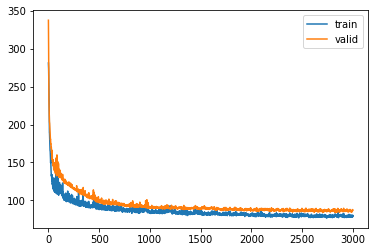

In [42]:
history = model.fit(train_1, labels_1, nb_epoch=3000, batch_size=256,validation_data=(test_1, test_labels_1), verbose=2,shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

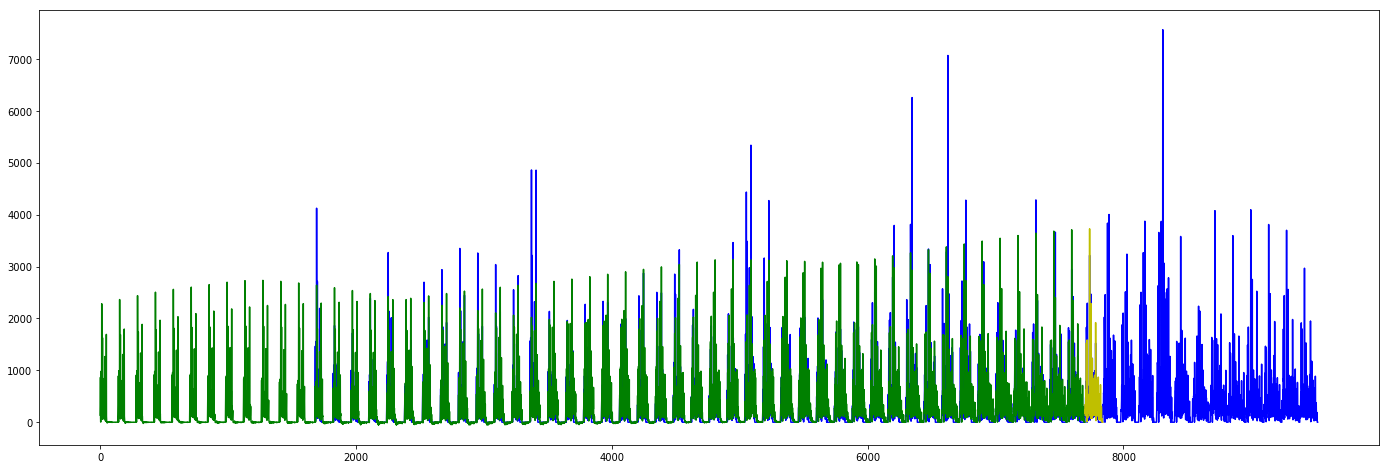

In [43]:
plt.figure(figsize=(24,8))
train_predict = model.predict(train_1)
valid_predict = model.predict(test_1)
#test_predict = model.predict(test_X)
plt.plot(labels[:-420], c='b')
plt.plot([x for x in train_predict], c='g')
plt.plot([None for _ in train_predict] + [x for x in valid_predict], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [44]:
model.save('my_model_08.h5')   # HDF5 file, you have to pip3 install h5py if don't have it

In [50]:
pred_test_labels_1=model.predict(test_1)

In [51]:
math.sqrt(((pred_test_labels_1 - test_labels_1)**2).mean())

618.6493325352639

In [60]:
pred=pred_test_labels_1.reshape(-1,)#这里被坑了好久，一直没有注意数据结构

In [59]:
test_labels_1.shape

(140,)

In [61]:
math.sqrt(((pred - test_labels_1)**2).mean())

143.89257342230042

In [140]:
model2 = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model2.add(LSTM(64, input_shape=(train_2.shape[1],train_2.shape[2])))
model2.add(Dropout(.1))
model2.add(Dense(64))
model2.add(Dropout(.2))
model2.add(Dense(16))
model2.add(Dropout(.2))
model2.add(Dense(1))
model2.compile(loss = rmse_loss, optimizer='adam', metrics=['mse'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                52736     
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_36 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total para

Train on 7840 samples, validate on 140 samples
Epoch 1/2000
 - 0s - loss: 140.0651 - mean_squared_error: 86472.0238 - val_loss: 182.3728 - val_mean_squared_error: 104471.1406
Epoch 2/2000
 - 0s - loss: 134.9988 - mean_squared_error: 84377.6924 - val_loss: 174.8070 - val_mean_squared_error: 96245.0391
Epoch 3/2000
 - 0s - loss: 121.7104 - mean_squared_error: 78829.5053 - val_loss: 181.0042 - val_mean_squared_error: 99663.1406
Epoch 4/2000
 - 0s - loss: 119.1761 - mean_squared_error: 77888.9332 - val_loss: 179.7535 - val_mean_squared_error: 98761.5000
Epoch 5/2000
 - 0s - loss: 122.4280 - mean_squared_error: 80780.7868 - val_loss: 185.5849 - val_mean_squared_error: 100432.2578
Epoch 6/2000
 - 0s - loss: 122.8566 - mean_squared_error: 77851.7756 - val_loss: 190.1665 - val_mean_squared_error: 101489.1250
Epoch 7/2000
 - 0s - loss: 118.4529 - mean_squared_error: 76304.6694 - val_loss: 190.6023 - val_mean_squared_error: 100419.6016
Epoch 8/2000
 - 0s - loss: 118.1132 - mean_squared_error: 74

Epoch 65/2000
 - 0s - loss: 106.6317 - mean_squared_error: 60184.7798 - val_loss: 149.4648 - val_mean_squared_error: 63028.8867
Epoch 66/2000
 - 0s - loss: 106.7259 - mean_squared_error: 60444.8718 - val_loss: 143.5953 - val_mean_squared_error: 60180.0000
Epoch 67/2000
 - 0s - loss: 104.3726 - mean_squared_error: 59943.8339 - val_loss: 146.7579 - val_mean_squared_error: 61768.2578
Epoch 68/2000
 - 0s - loss: 105.2708 - mean_squared_error: 60367.7461 - val_loss: 148.6809 - val_mean_squared_error: 62061.1289
Epoch 69/2000
 - 0s - loss: 105.0971 - mean_squared_error: 56495.8421 - val_loss: 148.3087 - val_mean_squared_error: 62345.9727
Epoch 70/2000
 - 0s - loss: 104.7906 - mean_squared_error: 60640.4351 - val_loss: 146.2268 - val_mean_squared_error: 60958.9648
Epoch 71/2000
 - 0s - loss: 104.3646 - mean_squared_error: 58601.6190 - val_loss: 146.4539 - val_mean_squared_error: 61017.0430
Epoch 72/2000
 - 0s - loss: 104.0641 - mean_squared_error: 57311.7392 - val_loss: 155.4682 - val_mean_sq

Epoch 129/2000
 - 0s - loss: 101.6763 - mean_squared_error: 58548.1512 - val_loss: 129.7971 - val_mean_squared_error: 50234.5312
Epoch 130/2000
 - 0s - loss: 101.6461 - mean_squared_error: 54088.9243 - val_loss: 132.0074 - val_mean_squared_error: 51016.8633
Epoch 131/2000
 - 0s - loss: 104.5913 - mean_squared_error: 56770.4816 - val_loss: 135.5180 - val_mean_squared_error: 51025.7031
Epoch 132/2000
 - 0s - loss: 106.9625 - mean_squared_error: 55279.1386 - val_loss: 142.4935 - val_mean_squared_error: 54394.0938
Epoch 133/2000
 - 0s - loss: 108.1463 - mean_squared_error: 56249.3908 - val_loss: 141.0851 - val_mean_squared_error: 51671.4375
Epoch 134/2000
 - 0s - loss: 116.6806 - mean_squared_error: 58528.6746 - val_loss: 126.4449 - val_mean_squared_error: 46790.0820
Epoch 135/2000
 - 0s - loss: 113.2543 - mean_squared_error: 54940.2675 - val_loss: 127.0731 - val_mean_squared_error: 46779.4922
Epoch 136/2000
 - 0s - loss: 105.6628 - mean_squared_error: 57413.1564 - val_loss: 132.0273 - val

Epoch 193/2000
 - 0s - loss: 107.0240 - mean_squared_error: 54056.2615 - val_loss: 122.4537 - val_mean_squared_error: 46904.9414
Epoch 194/2000
 - 0s - loss: 101.1005 - mean_squared_error: 56190.2677 - val_loss: 120.8081 - val_mean_squared_error: 44804.8594
Epoch 195/2000
 - 0s - loss: 105.0548 - mean_squared_error: 55731.9873 - val_loss: 122.4957 - val_mean_squared_error: 46138.9219
Epoch 196/2000
 - 0s - loss: 109.1050 - mean_squared_error: 56644.0418 - val_loss: 121.5771 - val_mean_squared_error: 46447.6211
Epoch 197/2000
 - 0s - loss: 113.1893 - mean_squared_error: 58423.4264 - val_loss: 123.4597 - val_mean_squared_error: 48031.1914
Epoch 198/2000
 - 0s - loss: 107.9791 - mean_squared_error: 57005.5354 - val_loss: 133.5633 - val_mean_squared_error: 54446.6289
Epoch 199/2000
 - 0s - loss: 106.9480 - mean_squared_error: 56115.3551 - val_loss: 122.1197 - val_mean_squared_error: 45935.5859
Epoch 200/2000
 - 0s - loss: 116.2608 - mean_squared_error: 58614.4882 - val_loss: 130.4353 - val

Epoch 257/2000
 - 0s - loss: 92.6381 - mean_squared_error: 48606.5401 - val_loss: 117.3759 - val_mean_squared_error: 36615.5195
Epoch 258/2000
 - 0s - loss: 92.7543 - mean_squared_error: 48409.3337 - val_loss: 113.9916 - val_mean_squared_error: 34620.6797
Epoch 259/2000
 - 0s - loss: 91.9860 - mean_squared_error: 48458.0145 - val_loss: 115.8882 - val_mean_squared_error: 35109.6367
Epoch 260/2000
 - 0s - loss: 92.2749 - mean_squared_error: 47582.3001 - val_loss: 112.4666 - val_mean_squared_error: 34270.6484
Epoch 261/2000
 - 0s - loss: 91.9308 - mean_squared_error: 48259.3750 - val_loss: 113.7940 - val_mean_squared_error: 34832.8086
Epoch 262/2000
 - 0s - loss: 92.1842 - mean_squared_error: 47469.7309 - val_loss: 114.0019 - val_mean_squared_error: 34999.4648
Epoch 263/2000
 - 0s - loss: 93.0884 - mean_squared_error: 49326.8534 - val_loss: 113.8819 - val_mean_squared_error: 34106.1641
Epoch 264/2000
 - 0s - loss: 92.1060 - mean_squared_error: 49726.9650 - val_loss: 114.4196 - val_mean_sq

 - 0s - loss: 92.7909 - mean_squared_error: 48828.4472 - val_loss: 103.9053 - val_mean_squared_error: 29013.4961
Epoch 322/2000
 - 0s - loss: 92.1692 - mean_squared_error: 45659.0615 - val_loss: 103.4699 - val_mean_squared_error: 28647.3223
Epoch 323/2000
 - 0s - loss: 91.2526 - mean_squared_error: 47782.3194 - val_loss: 101.8808 - val_mean_squared_error: 27880.2812
Epoch 324/2000
 - 0s - loss: 93.7837 - mean_squared_error: 51223.4588 - val_loss: 103.2446 - val_mean_squared_error: 29379.0508
Epoch 325/2000
 - 0s - loss: 90.9889 - mean_squared_error: 47612.8869 - val_loss: 102.6513 - val_mean_squared_error: 28570.4141
Epoch 326/2000
 - 0s - loss: 92.1729 - mean_squared_error: 46323.2362 - val_loss: 103.3765 - val_mean_squared_error: 28850.2324
Epoch 327/2000
 - 0s - loss: 92.1054 - mean_squared_error: 48511.1298 - val_loss: 101.0638 - val_mean_squared_error: 27125.9902
Epoch 328/2000
 - 0s - loss: 92.8349 - mean_squared_error: 47243.1439 - val_loss: 101.9463 - val_mean_squared_error: 28

Epoch 386/2000
 - 0s - loss: 90.3712 - mean_squared_error: 45909.9991 - val_loss: 107.9164 - val_mean_squared_error: 30412.7461
Epoch 387/2000
 - 0s - loss: 89.2396 - mean_squared_error: 46633.3748 - val_loss: 105.4143 - val_mean_squared_error: 28871.3945
Epoch 388/2000
 - 0s - loss: 87.4523 - mean_squared_error: 44765.1429 - val_loss: 104.5940 - val_mean_squared_error: 28772.5059
Epoch 389/2000
 - 0s - loss: 87.9021 - mean_squared_error: 45359.7675 - val_loss: 104.1552 - val_mean_squared_error: 28565.2070
Epoch 390/2000
 - 0s - loss: 86.9784 - mean_squared_error: 43811.0948 - val_loss: 103.5233 - val_mean_squared_error: 28246.4199
Epoch 391/2000
 - 0s - loss: 87.6584 - mean_squared_error: 46822.3109 - val_loss: 102.4278 - val_mean_squared_error: 28497.2227
Epoch 392/2000
 - 0s - loss: 88.6586 - mean_squared_error: 47425.2672 - val_loss: 103.2275 - val_mean_squared_error: 28638.8574
Epoch 393/2000
 - 0s - loss: 88.5600 - mean_squared_error: 45276.0962 - val_loss: 103.2252 - val_mean_sq

 - 0s - loss: 92.3576 - mean_squared_error: 45414.7339 - val_loss: 100.1005 - val_mean_squared_error: 25627.0586
Epoch 451/2000
 - 0s - loss: 91.2735 - mean_squared_error: 49291.0538 - val_loss: 101.4253 - val_mean_squared_error: 26393.6973
Epoch 452/2000
 - 0s - loss: 88.8151 - mean_squared_error: 45427.2386 - val_loss: 100.4572 - val_mean_squared_error: 26164.1348
Epoch 453/2000
 - 0s - loss: 86.1695 - mean_squared_error: 45631.1213 - val_loss: 100.1590 - val_mean_squared_error: 26131.8359
Epoch 454/2000
 - 0s - loss: 87.3623 - mean_squared_error: 47117.1339 - val_loss: 103.2619 - val_mean_squared_error: 26724.2090
Epoch 455/2000
 - 0s - loss: 88.8460 - mean_squared_error: 48402.6440 - val_loss: 103.9832 - val_mean_squared_error: 26750.4258
Epoch 456/2000
 - 0s - loss: 89.4023 - mean_squared_error: 48445.4716 - val_loss: 102.1435 - val_mean_squared_error: 26702.9824
Epoch 457/2000
 - 0s - loss: 87.7453 - mean_squared_error: 43581.9931 - val_loss: 101.6182 - val_mean_squared_error: 26

Epoch 515/2000
 - 0s - loss: 86.2089 - mean_squared_error: 44476.1953 - val_loss: 113.2358 - val_mean_squared_error: 29463.2422
Epoch 516/2000
 - 0s - loss: 89.0643 - mean_squared_error: 44469.1569 - val_loss: 108.7558 - val_mean_squared_error: 28020.8223
Epoch 517/2000
 - 0s - loss: 88.0414 - mean_squared_error: 45359.0864 - val_loss: 107.4180 - val_mean_squared_error: 27758.9062
Epoch 518/2000
 - 0s - loss: 86.6868 - mean_squared_error: 43960.7711 - val_loss: 106.7497 - val_mean_squared_error: 27650.1719
Epoch 519/2000
 - 0s - loss: 86.5997 - mean_squared_error: 42727.5383 - val_loss: 119.7115 - val_mean_squared_error: 30929.6152
Epoch 520/2000
 - 0s - loss: 86.8560 - mean_squared_error: 44362.1603 - val_loss: 112.8285 - val_mean_squared_error: 28853.5117
Epoch 521/2000
 - 0s - loss: 87.4722 - mean_squared_error: 44362.7280 - val_loss: 106.2672 - val_mean_squared_error: 27344.6094
Epoch 522/2000
 - 0s - loss: 89.6002 - mean_squared_error: 48074.2787 - val_loss: 104.8604 - val_mean_sq

 - 0s - loss: 91.7610 - mean_squared_error: 45418.3375 - val_loss: 101.8672 - val_mean_squared_error: 25897.9199
Epoch 580/2000
 - 0s - loss: 91.0358 - mean_squared_error: 48540.7500 - val_loss: 97.3904 - val_mean_squared_error: 23870.7637
Epoch 581/2000
 - 0s - loss: 90.7488 - mean_squared_error: 45363.6344 - val_loss: 100.8509 - val_mean_squared_error: 25157.7090
Epoch 582/2000
 - 0s - loss: 92.4999 - mean_squared_error: 47789.8906 - val_loss: 97.9033 - val_mean_squared_error: 24120.7402
Epoch 583/2000
 - 0s - loss: 90.3585 - mean_squared_error: 47286.6375 - val_loss: 100.4697 - val_mean_squared_error: 25089.9023
Epoch 584/2000
 - 0s - loss: 96.1831 - mean_squared_error: 49316.4290 - val_loss: 98.9424 - val_mean_squared_error: 24820.2773
Epoch 585/2000
 - 0s - loss: 92.0725 - mean_squared_error: 45953.2854 - val_loss: 99.7811 - val_mean_squared_error: 24461.6152
Epoch 586/2000
 - 0s - loss: 90.9269 - mean_squared_error: 47280.4770 - val_loss: 98.4437 - val_mean_squared_error: 24353.7

Epoch 655/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 656/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 657/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 658/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 659/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 660/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 661/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 662/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 663/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 664/2000
 - 0s - loss: nan - mean_squared_error: 

 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 734/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 735/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 736/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 737/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 738/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 739/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 740/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 741/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 742/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss:

Epoch 812/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 813/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 814/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 815/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 816/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 817/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 818/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 819/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 820/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 821/2000
 - 0s - loss: nan - mean_squared_error: 

 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 891/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 892/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 893/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 894/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 895/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 896/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 897/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 898/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 899/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss:

Epoch 969/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 970/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 971/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 972/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 973/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 974/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 975/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 976/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 977/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 978/2000
 - 0s - loss: nan - mean_squared_error: 

Epoch 1047/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1048/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1049/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1050/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1051/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1052/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1053/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1054/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1055/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1056/2000
 - 0s - loss: nan - mean_squar

Epoch 1125/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1126/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1127/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1128/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1129/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1130/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1131/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1132/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1133/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1134/2000
 - 0s - loss: nan - mean_squar

Epoch 1203/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1204/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1205/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1206/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1207/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1208/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1209/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1210/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1211/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1212/2000
 - 0s - loss: nan - mean_squar

Epoch 1281/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1282/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1283/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1284/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1285/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1286/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1287/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1288/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1289/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1290/2000
 - 0s - loss: nan - mean_squar

Epoch 1359/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1360/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1361/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1362/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1363/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1364/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1365/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1366/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1367/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1368/2000
 - 0s - loss: nan - mean_squar

Epoch 1437/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1438/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1439/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1440/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1441/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1442/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1443/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1444/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1445/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1446/2000
 - 0s - loss: nan - mean_squar

Epoch 1515/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1516/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1517/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1518/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1519/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1520/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1521/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1522/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1523/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1524/2000
 - 0s - loss: nan - mean_squar

Epoch 1593/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1594/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1595/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1596/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1597/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1598/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1599/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1600/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1601/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1602/2000
 - 0s - loss: nan - mean_squar

Epoch 1671/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1672/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1673/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1674/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1675/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1676/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1677/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1678/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1679/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1680/2000
 - 0s - loss: nan - mean_squar

Epoch 1749/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1750/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1751/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1752/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1753/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1754/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1755/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1756/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1757/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1758/2000
 - 0s - loss: nan - mean_squar

Epoch 1827/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1828/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1829/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1830/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1831/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1832/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1833/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1834/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1835/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1836/2000
 - 0s - loss: nan - mean_squar

Epoch 1905/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1906/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1907/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1908/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1909/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1910/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1911/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1912/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1913/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1914/2000
 - 0s - loss: nan - mean_squar

Epoch 1983/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1984/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1985/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1986/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1987/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1988/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1989/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1990/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1991/2000
 - 0s - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 1992/2000
 - 0s - loss: nan - mean_squar

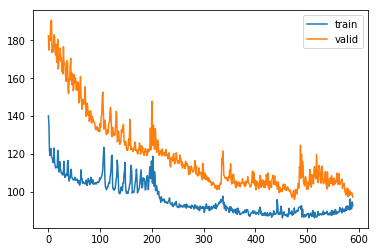

In [142]:
history2 = model2.fit(train_2, labels_2, nb_epoch=2000, batch_size=256,validation_data=(test_2, test_labels_2), verbose=2,shuffle=False)
# plot history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

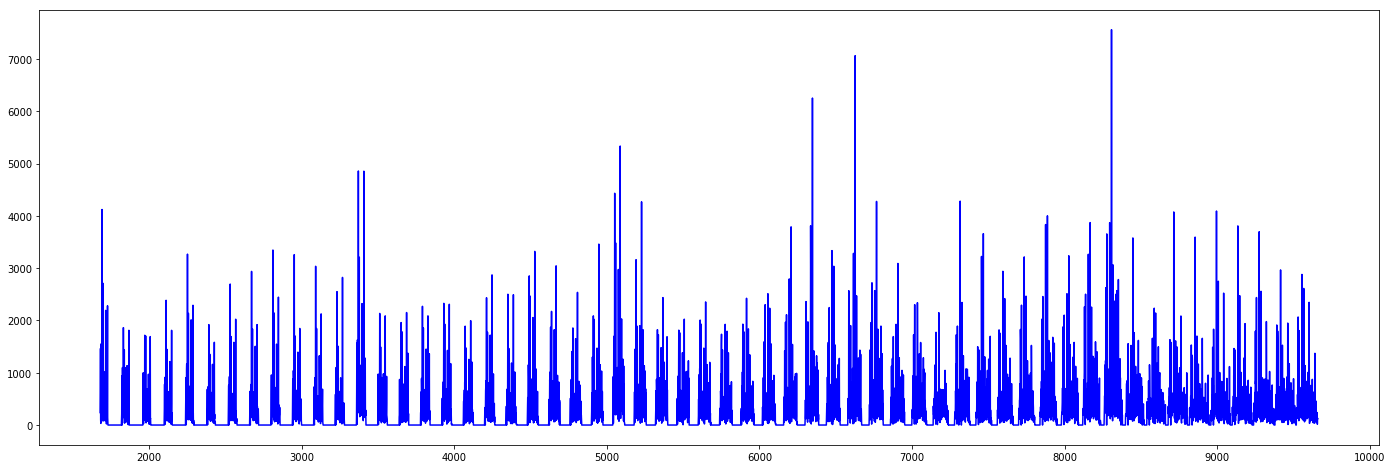

In [65]:
plt.figure(figsize=(24,8))
train_predict2 = model2.predict(train_2)
valid_predict2 = model2.predict(test_2)
#test_predict = model.predict(test_X)
plt.plot(labels[:-280], c='b')
plt.plot([x for x in train_predict2], c='g')
plt.plot([None for _ in train_predict2] + [x for x in valid_predict2], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [66]:
pred_test_labels_2=model2.predict(test_2)
math.sqrt(((pred_test_labels_2.reshape(-1,) - test_labels_2)**2).mean())

nan

In [94]:
model3 = Sequential()
# model.add(LSTM(
#     batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
#     output_dim=CELL_SIZE,
#     return_sequences=True,      # True: output at all steps. False: output as last step.
#     stateful=True,              # True: the final state of batch1 is feed into the initial state of batch2
# ))
model3.add(LSTM(64, input_shape=(train_3.shape[1],train_3.shape[2])))
model3.add(Dropout(.5))
model3.add(Dense(64))
model3.add(Dropout(.5))
model3.add(Dense(16))
model3.add(Dropout(.5))
model3.add(Dense(1))
model3.compile(loss ='mse', optimizer='adam', metrics=['mse'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                52736     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_33 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total para

Train on 7980 samples, validate on 140 samples
Epoch 1/1000
 - 0s - loss: 58584.7291 - mean_squared_error: 58584.7291 - val_loss: 26212.9512 - val_mean_squared_error: 26212.9512
Epoch 2/1000
 - 0s - loss: 51378.0374 - mean_squared_error: 51378.0374 - val_loss: 26226.3223 - val_mean_squared_error: 26226.3223
Epoch 3/1000
 - 0s - loss: 56009.1934 - mean_squared_error: 56009.1934 - val_loss: 25785.4902 - val_mean_squared_error: 25785.4902
Epoch 4/1000
 - 0s - loss: 56868.1471 - mean_squared_error: 56868.1471 - val_loss: 25845.1543 - val_mean_squared_error: 25845.1543
Epoch 5/1000
 - 0s - loss: 56077.7988 - mean_squared_error: 56077.7988 - val_loss: 26064.3027 - val_mean_squared_error: 26064.3027
Epoch 6/1000
 - 0s - loss: 54806.2034 - mean_squared_error: 54806.2034 - val_loss: 25894.9473 - val_mean_squared_error: 25894.9473
Epoch 7/1000
 - 0s - loss: 57206.8988 - mean_squared_error: 57206.8988 - val_loss: 25554.6172 - val_mean_squared_error: 25554.6172
Epoch 8/1000
 - 0s - loss: 58954.751

Epoch 63/1000
 - 0s - loss: 57692.4014 - mean_squared_error: 57692.4014 - val_loss: 25351.8418 - val_mean_squared_error: 25351.8418
Epoch 64/1000
 - 0s - loss: 57427.5695 - mean_squared_error: 57427.5695 - val_loss: 25413.1543 - val_mean_squared_error: 25413.1543
Epoch 65/1000
 - 0s - loss: 63047.9374 - mean_squared_error: 63047.9374 - val_loss: 25791.7109 - val_mean_squared_error: 25791.7109
Epoch 66/1000
 - 0s - loss: 56709.0005 - mean_squared_error: 56709.0005 - val_loss: 25575.0996 - val_mean_squared_error: 25575.0996
Epoch 67/1000
 - 0s - loss: 52813.0739 - mean_squared_error: 52813.0739 - val_loss: 25055.6465 - val_mean_squared_error: 25055.6465
Epoch 68/1000
 - 0s - loss: 58175.7381 - mean_squared_error: 58175.7381 - val_loss: 25071.5352 - val_mean_squared_error: 25071.5352
Epoch 69/1000
 - 0s - loss: 58671.6998 - mean_squared_error: 58671.6998 - val_loss: 25179.6895 - val_mean_squared_error: 25179.6895
Epoch 70/1000
 - 0s - loss: 55319.1034 - mean_squared_error: 55319.1034 - va

Epoch 125/1000
 - 0s - loss: 54771.1079 - mean_squared_error: 54771.1079 - val_loss: 26149.7344 - val_mean_squared_error: 26149.7344
Epoch 126/1000
 - 0s - loss: 55732.7524 - mean_squared_error: 55732.7524 - val_loss: 26278.7324 - val_mean_squared_error: 26278.7324
Epoch 127/1000
 - 0s - loss: 58657.2815 - mean_squared_error: 58657.2815 - val_loss: 25741.8867 - val_mean_squared_error: 25741.8867
Epoch 128/1000
 - 0s - loss: 56525.7455 - mean_squared_error: 56525.7455 - val_loss: 25544.0469 - val_mean_squared_error: 25544.0469
Epoch 129/1000
 - 0s - loss: 52241.5260 - mean_squared_error: 52241.5260 - val_loss: 25844.7578 - val_mean_squared_error: 25844.7578
Epoch 130/1000
 - 0s - loss: 60179.2729 - mean_squared_error: 60179.2729 - val_loss: 26021.5723 - val_mean_squared_error: 26021.5723
Epoch 131/1000
 - 0s - loss: 59529.1784 - mean_squared_error: 59529.1784 - val_loss: 26133.7402 - val_mean_squared_error: 26133.7402
Epoch 132/1000
 - 0s - loss: 58179.7815 - mean_squared_error: 58179.7

Epoch 187/1000
 - 0s - loss: 55429.5747 - mean_squared_error: 55429.5747 - val_loss: 25797.9648 - val_mean_squared_error: 25797.9648
Epoch 188/1000
 - 0s - loss: 52532.0089 - mean_squared_error: 52532.0089 - val_loss: 25740.5117 - val_mean_squared_error: 25740.5117
Epoch 189/1000
 - 0s - loss: 57788.3184 - mean_squared_error: 57788.3184 - val_loss: 25591.1211 - val_mean_squared_error: 25591.1211
Epoch 190/1000
 - 0s - loss: 54290.3647 - mean_squared_error: 54290.3647 - val_loss: 25884.5605 - val_mean_squared_error: 25884.5605
Epoch 191/1000
 - 0s - loss: 56795.1325 - mean_squared_error: 56795.1325 - val_loss: 25757.2539 - val_mean_squared_error: 25757.2539
Epoch 192/1000
 - 0s - loss: 54788.6481 - mean_squared_error: 54788.6481 - val_loss: 25487.6074 - val_mean_squared_error: 25487.6074
Epoch 193/1000
 - 0s - loss: 53951.6681 - mean_squared_error: 53951.6681 - val_loss: 25407.1348 - val_mean_squared_error: 25407.1348
Epoch 194/1000
 - 0s - loss: 51306.7353 - mean_squared_error: 51306.7

Epoch 249/1000
 - 0s - loss: 53418.8267 - mean_squared_error: 53418.8267 - val_loss: 25141.8516 - val_mean_squared_error: 25141.8516
Epoch 250/1000
 - 0s - loss: 54798.3059 - mean_squared_error: 54798.3059 - val_loss: 25874.0703 - val_mean_squared_error: 25874.0703
Epoch 251/1000
 - 0s - loss: 59269.9559 - mean_squared_error: 59269.9559 - val_loss: 26163.6152 - val_mean_squared_error: 26163.6152
Epoch 252/1000
 - 0s - loss: 57883.4588 - mean_squared_error: 57883.4588 - val_loss: 26351.6035 - val_mean_squared_error: 26351.6035
Epoch 253/1000
 - 0s - loss: 49393.1531 - mean_squared_error: 49393.1531 - val_loss: 25436.9688 - val_mean_squared_error: 25436.9688
Epoch 254/1000
 - 0s - loss: 61436.3011 - mean_squared_error: 61436.3011 - val_loss: 24776.8594 - val_mean_squared_error: 24776.8594
Epoch 255/1000
 - 0s - loss: 55798.9370 - mean_squared_error: 55798.9370 - val_loss: 24860.0859 - val_mean_squared_error: 24860.0859
Epoch 256/1000
 - 0s - loss: 53163.2363 - mean_squared_error: 53163.2

Epoch 311/1000
 - 0s - loss: 58057.9121 - mean_squared_error: 58057.9121 - val_loss: 26434.3535 - val_mean_squared_error: 26434.3535
Epoch 312/1000
 - 0s - loss: 54637.0112 - mean_squared_error: 54637.0112 - val_loss: 25775.3652 - val_mean_squared_error: 25775.3652
Epoch 313/1000
 - 0s - loss: 55995.1563 - mean_squared_error: 55995.1563 - val_loss: 25092.8438 - val_mean_squared_error: 25092.8438
Epoch 314/1000
 - 0s - loss: 58350.2719 - mean_squared_error: 58350.2719 - val_loss: 25084.9980 - val_mean_squared_error: 25084.9980
Epoch 315/1000
 - 0s - loss: 56524.3797 - mean_squared_error: 56524.3797 - val_loss: 26203.1289 - val_mean_squared_error: 26203.1289
Epoch 316/1000
 - 0s - loss: 55715.3961 - mean_squared_error: 55715.3961 - val_loss: 27040.1074 - val_mean_squared_error: 27040.1074
Epoch 317/1000
 - 0s - loss: 58399.5555 - mean_squared_error: 58399.5555 - val_loss: 26332.0391 - val_mean_squared_error: 26332.0391
Epoch 318/1000
 - 0s - loss: 54956.0494 - mean_squared_error: 54956.0

Epoch 373/1000
 - 0s - loss: 58885.8211 - mean_squared_error: 58885.8211 - val_loss: 25406.8477 - val_mean_squared_error: 25406.8477
Epoch 374/1000
 - 0s - loss: 54746.0470 - mean_squared_error: 54746.0470 - val_loss: 25447.8496 - val_mean_squared_error: 25447.8496
Epoch 375/1000
 - 0s - loss: 60012.8300 - mean_squared_error: 60012.8300 - val_loss: 25879.8926 - val_mean_squared_error: 25879.8926
Epoch 376/1000
 - 0s - loss: 56059.8857 - mean_squared_error: 56059.8857 - val_loss: 25704.8223 - val_mean_squared_error: 25704.8223
Epoch 377/1000
 - 0s - loss: 55435.7563 - mean_squared_error: 55435.7563 - val_loss: 25111.2812 - val_mean_squared_error: 25111.2812
Epoch 378/1000
 - 0s - loss: 59180.4586 - mean_squared_error: 59180.4586 - val_loss: 24946.1230 - val_mean_squared_error: 24946.1230
Epoch 379/1000
 - 0s - loss: 55399.5793 - mean_squared_error: 55399.5793 - val_loss: 25493.5723 - val_mean_squared_error: 25493.5723
Epoch 380/1000
 - 0s - loss: 53647.4444 - mean_squared_error: 53647.4

Epoch 435/1000
 - 0s - loss: 59927.7256 - mean_squared_error: 59927.7256 - val_loss: 25425.9785 - val_mean_squared_error: 25425.9785
Epoch 436/1000
 - 0s - loss: 56074.6616 - mean_squared_error: 56074.6616 - val_loss: 25944.4688 - val_mean_squared_error: 25944.4688
Epoch 437/1000
 - 0s - loss: 58834.5581 - mean_squared_error: 58834.5581 - val_loss: 26730.7441 - val_mean_squared_error: 26730.7441
Epoch 438/1000
 - 0s - loss: 58390.7293 - mean_squared_error: 58390.7293 - val_loss: 26800.4668 - val_mean_squared_error: 26800.4668
Epoch 439/1000
 - 0s - loss: 56579.6297 - mean_squared_error: 56579.6297 - val_loss: 26062.4883 - val_mean_squared_error: 26062.4883
Epoch 440/1000
 - 0s - loss: 52857.7779 - mean_squared_error: 52857.7779 - val_loss: 25361.5840 - val_mean_squared_error: 25361.5840
Epoch 441/1000
 - 0s - loss: 54094.7429 - mean_squared_error: 54094.7429 - val_loss: 25627.4863 - val_mean_squared_error: 25627.4863
Epoch 442/1000
 - 0s - loss: 58594.8857 - mean_squared_error: 58594.8

Epoch 497/1000
 - 0s - loss: 57160.0904 - mean_squared_error: 57160.0904 - val_loss: 26278.8555 - val_mean_squared_error: 26278.8555
Epoch 498/1000
 - 0s - loss: 58435.4664 - mean_squared_error: 58435.4664 - val_loss: 25556.9883 - val_mean_squared_error: 25556.9883
Epoch 499/1000
 - 0s - loss: 56494.7932 - mean_squared_error: 56494.7932 - val_loss: 25431.0176 - val_mean_squared_error: 25431.0176
Epoch 500/1000
 - 0s - loss: 52598.7747 - mean_squared_error: 52598.7747 - val_loss: 25916.7246 - val_mean_squared_error: 25916.7246
Epoch 501/1000
 - 0s - loss: 55710.2145 - mean_squared_error: 55710.2145 - val_loss: 26248.1738 - val_mean_squared_error: 26248.1738
Epoch 502/1000
 - 0s - loss: 52979.6479 - mean_squared_error: 52979.6479 - val_loss: 26362.7363 - val_mean_squared_error: 26362.7363
Epoch 503/1000
 - 0s - loss: 56101.4162 - mean_squared_error: 56101.4162 - val_loss: 25787.4980 - val_mean_squared_error: 25787.4980
Epoch 504/1000
 - 0s - loss: 51010.4557 - mean_squared_error: 51010.4

Epoch 559/1000
 - 0s - loss: 58270.1420 - mean_squared_error: 58270.1420 - val_loss: 26008.5742 - val_mean_squared_error: 26008.5742
Epoch 560/1000
 - 0s - loss: 57363.3423 - mean_squared_error: 57363.3423 - val_loss: 26016.1660 - val_mean_squared_error: 26016.1660
Epoch 561/1000
 - 0s - loss: 57333.7616 - mean_squared_error: 57333.7616 - val_loss: 26748.3555 - val_mean_squared_error: 26748.3555
Epoch 562/1000
 - 0s - loss: 53898.4419 - mean_squared_error: 53898.4419 - val_loss: 26700.0371 - val_mean_squared_error: 26700.0371
Epoch 563/1000
 - 0s - loss: 64072.3155 - mean_squared_error: 64072.3155 - val_loss: 26020.1348 - val_mean_squared_error: 26020.1348
Epoch 564/1000
 - 0s - loss: 56021.0717 - mean_squared_error: 56021.0717 - val_loss: 26525.2598 - val_mean_squared_error: 26525.2598
Epoch 565/1000
 - 0s - loss: 65352.3888 - mean_squared_error: 65352.3888 - val_loss: 26963.4492 - val_mean_squared_error: 26963.4492
Epoch 566/1000
 - 0s - loss: 55653.3831 - mean_squared_error: 55653.3

Epoch 621/1000
 - 0s - loss: 51748.2096 - mean_squared_error: 51748.2096 - val_loss: 25451.1582 - val_mean_squared_error: 25451.1582
Epoch 622/1000
 - 0s - loss: 57092.9813 - mean_squared_error: 57092.9813 - val_loss: 25254.5801 - val_mean_squared_error: 25254.5801
Epoch 623/1000
 - 0s - loss: 59247.3151 - mean_squared_error: 59247.3151 - val_loss: 25473.5586 - val_mean_squared_error: 25473.5586
Epoch 624/1000
 - 0s - loss: 54457.6934 - mean_squared_error: 54457.6934 - val_loss: 26165.7598 - val_mean_squared_error: 26165.7598
Epoch 625/1000
 - 0s - loss: 62968.5545 - mean_squared_error: 62968.5545 - val_loss: 26436.3848 - val_mean_squared_error: 26436.3848
Epoch 626/1000
 - 0s - loss: 53622.0600 - mean_squared_error: 53622.0600 - val_loss: 26801.9766 - val_mean_squared_error: 26801.9766
Epoch 627/1000
 - 0s - loss: 54799.9087 - mean_squared_error: 54799.9087 - val_loss: 26521.4434 - val_mean_squared_error: 26521.4434
Epoch 628/1000
 - 0s - loss: 57529.2197 - mean_squared_error: 57529.2

Epoch 683/1000
 - 0s - loss: 54707.8640 - mean_squared_error: 54707.8640 - val_loss: 26352.0039 - val_mean_squared_error: 26352.0039
Epoch 684/1000
 - 0s - loss: 50008.5099 - mean_squared_error: 50008.5099 - val_loss: 26839.1582 - val_mean_squared_error: 26839.1582
Epoch 685/1000
 - 0s - loss: 58343.3417 - mean_squared_error: 58343.3417 - val_loss: 26608.6602 - val_mean_squared_error: 26608.6602
Epoch 686/1000
 - 0s - loss: 56282.9008 - mean_squared_error: 56282.9008 - val_loss: 26100.6992 - val_mean_squared_error: 26100.6992
Epoch 687/1000
 - 0s - loss: 54831.0354 - mean_squared_error: 54831.0354 - val_loss: 25529.0840 - val_mean_squared_error: 25529.0840
Epoch 688/1000
 - 0s - loss: 57371.6345 - mean_squared_error: 57371.6345 - val_loss: 25908.2383 - val_mean_squared_error: 25908.2383
Epoch 689/1000
 - 0s - loss: 58331.7253 - mean_squared_error: 58331.7253 - val_loss: 27132.5020 - val_mean_squared_error: 27132.5020
Epoch 690/1000
 - 0s - loss: 60528.4068 - mean_squared_error: 60528.4

Epoch 745/1000
 - 0s - loss: 57682.7241 - mean_squared_error: 57682.7241 - val_loss: 26995.3145 - val_mean_squared_error: 26995.3145
Epoch 746/1000
 - 0s - loss: 56634.7234 - mean_squared_error: 56634.7234 - val_loss: 26792.0078 - val_mean_squared_error: 26792.0078
Epoch 747/1000
 - 0s - loss: 57613.1352 - mean_squared_error: 57613.1352 - val_loss: 26698.0723 - val_mean_squared_error: 26698.0723
Epoch 748/1000
 - 0s - loss: 53504.0387 - mean_squared_error: 53504.0387 - val_loss: 26104.6621 - val_mean_squared_error: 26104.6621
Epoch 749/1000
 - 0s - loss: 55161.6115 - mean_squared_error: 55161.6115 - val_loss: 25527.6758 - val_mean_squared_error: 25527.6758
Epoch 750/1000
 - 0s - loss: 54796.9214 - mean_squared_error: 54796.9214 - val_loss: 25352.2070 - val_mean_squared_error: 25352.2070
Epoch 751/1000
 - 0s - loss: 56778.1070 - mean_squared_error: 56778.1070 - val_loss: 26162.0410 - val_mean_squared_error: 26162.0410
Epoch 752/1000
 - 0s - loss: 55946.8729 - mean_squared_error: 55946.8

Epoch 807/1000
 - 0s - loss: 57646.1489 - mean_squared_error: 57646.1489 - val_loss: 26136.4570 - val_mean_squared_error: 26136.4570
Epoch 808/1000
 - 0s - loss: 53197.5628 - mean_squared_error: 53197.5628 - val_loss: 25888.5938 - val_mean_squared_error: 25888.5938
Epoch 809/1000
 - 0s - loss: 58831.2154 - mean_squared_error: 58831.2154 - val_loss: 25403.4473 - val_mean_squared_error: 25403.4473
Epoch 810/1000
 - 0s - loss: 53515.3662 - mean_squared_error: 53515.3662 - val_loss: 25552.6719 - val_mean_squared_error: 25552.6719
Epoch 811/1000
 - 0s - loss: 52435.9822 - mean_squared_error: 52435.9822 - val_loss: 25608.0078 - val_mean_squared_error: 25608.0078
Epoch 812/1000
 - 0s - loss: 56879.0872 - mean_squared_error: 56879.0872 - val_loss: 25579.5645 - val_mean_squared_error: 25579.5645
Epoch 813/1000
 - 0s - loss: 61637.9661 - mean_squared_error: 61637.9661 - val_loss: 26659.4277 - val_mean_squared_error: 26659.4277
Epoch 814/1000
 - 0s - loss: 62139.4271 - mean_squared_error: 62139.4

Epoch 869/1000
 - 0s - loss: 54755.5387 - mean_squared_error: 54755.5387 - val_loss: 25668.1309 - val_mean_squared_error: 25668.1309
Epoch 870/1000
 - 0s - loss: 55868.4175 - mean_squared_error: 55868.4175 - val_loss: 26529.6914 - val_mean_squared_error: 26529.6914
Epoch 871/1000
 - 0s - loss: 57300.2555 - mean_squared_error: 57300.2555 - val_loss: 26957.3926 - val_mean_squared_error: 26957.3926
Epoch 872/1000
 - 0s - loss: 53761.6571 - mean_squared_error: 53761.6571 - val_loss: 26382.3984 - val_mean_squared_error: 26382.3984
Epoch 873/1000
 - 0s - loss: 57413.0391 - mean_squared_error: 57413.0391 - val_loss: 25403.9473 - val_mean_squared_error: 25403.9473
Epoch 874/1000
 - 0s - loss: 55933.9524 - mean_squared_error: 55933.9524 - val_loss: 25193.2109 - val_mean_squared_error: 25193.2109
Epoch 875/1000
 - 0s - loss: 54098.8008 - mean_squared_error: 54098.8008 - val_loss: 25748.6191 - val_mean_squared_error: 25748.6191
Epoch 876/1000
 - 0s - loss: 52620.9540 - mean_squared_error: 52620.9

Epoch 931/1000
 - 0s - loss: 52403.8948 - mean_squared_error: 52403.8948 - val_loss: 26068.8496 - val_mean_squared_error: 26068.8496
Epoch 932/1000
 - 0s - loss: 50577.2874 - mean_squared_error: 50577.2874 - val_loss: 26173.9668 - val_mean_squared_error: 26173.9668
Epoch 933/1000
 - 0s - loss: 56819.3154 - mean_squared_error: 56819.3154 - val_loss: 26160.4434 - val_mean_squared_error: 26160.4434
Epoch 934/1000
 - 0s - loss: 56217.1015 - mean_squared_error: 56217.1015 - val_loss: 26146.0469 - val_mean_squared_error: 26146.0469
Epoch 935/1000
 - 0s - loss: 56993.0748 - mean_squared_error: 56993.0748 - val_loss: 26040.2812 - val_mean_squared_error: 26040.2812
Epoch 936/1000
 - 0s - loss: 54891.0787 - mean_squared_error: 54891.0787 - val_loss: 26111.3086 - val_mean_squared_error: 26111.3086
Epoch 937/1000
 - 0s - loss: 50854.0778 - mean_squared_error: 50854.0778 - val_loss: 26033.2051 - val_mean_squared_error: 26033.2051
Epoch 938/1000
 - 0s - loss: 53666.5330 - mean_squared_error: 53666.5

Epoch 993/1000
 - 0s - loss: 57753.3055 - mean_squared_error: 57753.3055 - val_loss: 25730.3535 - val_mean_squared_error: 25730.3535
Epoch 994/1000
 - 0s - loss: 54472.4598 - mean_squared_error: 54472.4598 - val_loss: 26283.4688 - val_mean_squared_error: 26283.4688
Epoch 995/1000
 - 0s - loss: 55358.1385 - mean_squared_error: 55358.1385 - val_loss: 26920.1816 - val_mean_squared_error: 26920.1816
Epoch 996/1000
 - 0s - loss: 59312.3643 - mean_squared_error: 59312.3643 - val_loss: 27124.9824 - val_mean_squared_error: 27124.9824
Epoch 997/1000
 - 0s - loss: 56024.1270 - mean_squared_error: 56024.1270 - val_loss: 26370.8105 - val_mean_squared_error: 26370.8105
Epoch 998/1000
 - 0s - loss: 53568.4704 - mean_squared_error: 53568.4704 - val_loss: 26033.6992 - val_mean_squared_error: 26033.6992
Epoch 999/1000
 - 0s - loss: 53803.2270 - mean_squared_error: 53803.2270 - val_loss: 26314.6074 - val_mean_squared_error: 26314.6074
Epoch 1000/1000
 - 0s - loss: 51022.4454 - mean_squared_error: 51022.

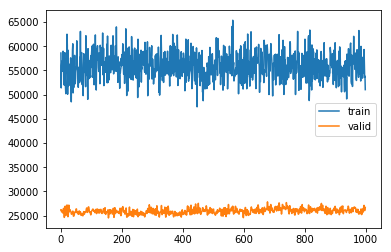

In [127]:
history3 = model3.fit(train_3, labels_3, nb_epoch=1000, batch_size=2000,validation_data=(test_3, test_labels_3), verbose=2,shuffle=False)
# plot history
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [126]:
model3.save('my_model_10.h5')  

In [97]:
from keras.models import load_model
model3 = load_model('my_model_10.h5')

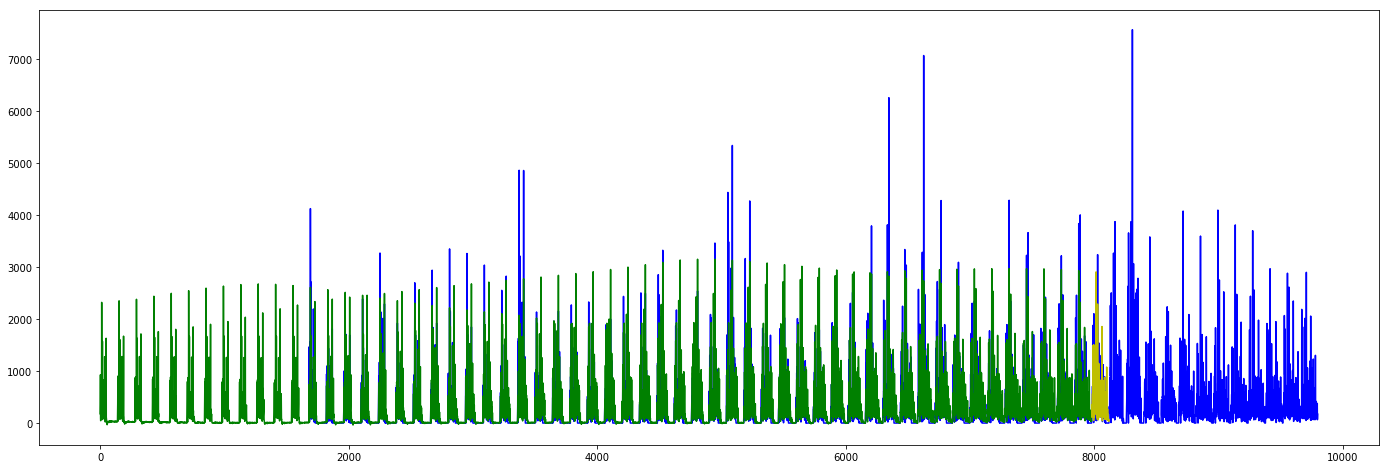

In [123]:
plt.figure(figsize=(24,8))
train_predict3 = model3.predict(train_3)
valid_predict3 = model3.predict(test_3)
#test_predict = model.predict(test_X)
plt.plot(labels[:-140], c='b')
plt.plot([x for x in train_predict3], c='g')
plt.plot([None for _ in train_predict3] + [x for x in valid_predict3], c='y')
#plt.plot([None for _ in train_predict] + [None for _ in valid_predict] + [x for x in test_predict], c='r')
plt.show()

In [124]:
import scipy as sp

In [125]:
sp.sqrt(sp.mean((valid_predict3.reshape(-1,) - test_labels_3) ** 2))

159.77185598515808

In [74]:
valid_predict3

array([[ 235.2095  ],
       [ 176.02602 ],
       [ 185.65567 ],
       [ 217.81772 ],
       [ 121.10798 ],
       [ 309.6761  ],
       [ 335.7842  ],
       [ 492.41434 ],
       [ 207.87378 ],
       [ 510.73734 ],
       [ 463.95374 ],
       [1285.8934  ],
       [ 595.07983 ],
       [ 514.87225 ],
       [ 142.24657 ],
       [ 525.6111  ],
       [  41.757893],
       [1333.622   ],
       [1209.8331  ],
       [ 308.50034 ],
       [ 216.18268 ],
       [ 167.0645  ],
       [ 220.17163 ],
       [ 203.0039  ],
       [ 134.66754 ],
       [ 294.83295 ],
       [ 381.02505 ],
       [ 245.26605 ],
       [ 415.82867 ],
       [ 404.83398 ],
       [ 386.85474 ],
       [ 505.07413 ],
       [ 180.59628 ],
       [ 278.7617  ],
       [ 221.54224 ],
       [ 445.6651  ],
       [2535.7488  ],
       [ 250.41785 ],
       [ 287.0181  ],
       [ 524.68353 ],
       [  92.66636 ],
       [ 134.71318 ],
       [ 244.61093 ],
       [ 433.25558 ],
       [ 194.02515 ],
       [ 6

In [100]:
ggg=np.array([1,2,3])

In [101]:
sp.mean(ggg)

2.0